# **Interconnect Client Churn Level Prediction**

## **Introduction**

Interconnect, a telecommunications operator, aims to predict customer churn to proactively retain clients by offering personalized promotions and service packages. By accurately forecasting churn, Interconnect can improve customer retention, reduce acquisition costs, and increase overall profitability. Implementing predictive models will enable the marketing team to identify at-risk customers and take targeted actions, leading to better customer satisfaction and loyalty.

#### **Project Output**

- **Proactive Customer Retention**:
  By predicting which customers are likely to churn, Interconnect can proactively reach out with personalized offers, discounts, or service improvements. Hence this approach helps in retaining customers who might otherwise leave, improving customer loyalty and satisfaction.

- **Cost Efficiency**:
  Retaining existing customers is generally more cost-effective than acquiring new ones. These result from the predictive modeling helps allocate resources efficiently, focusing on high-risk customers. Resulting to reduction in churn leads to lower marketing and sales expenses associated with acquiring new customers.

- **Revenue Growth**:
  Improved retention rates directly contribute to stable and potentially increased revenue streams. Customers retained through targeted strategies are more likely to continue using additional services, enhancing revenue per customer.

- **Personalized Customer Engagement**:
  Insights from predictive models enable the creation of personalized engagement strategies that resonate better with customers.This personalization fosters a stronger connection between the customer and the brand, leading to longer-lasting relationships.

- **Strategic Business Insights**:
  Understanding the factors driving churn allows for strategic adjustments in services, pricing, and customer support. Which resulting the business leaders can make data-driven decisions to enhance overall service quality and customer experience.

- **Competitive Advantage**:
  Implementing advanced predictive analytics provides a competitive edge by enabling more effective customer management. This resulting the company able to staying ahead in customer retention efforts helps Interconnect outperform competitors in the market.

### **Project Objectives**

- Developed a client churn prediction model using the AUC-ROC metric as a key indicator of success.
- Compare the distribution of monthly payments (MonthlyCharges) between active and lapsed clients, and calculate important statistics for each group.
- Produce informative reports and adequate presentations for stakeholders at Interconnect.


### **Table of Content**

* [**Introduction**](#introduction)
  * [**Project Output**](#project-output)
  * [**Project Objectives**](#project-objectives)
  * [**Table of Content**](#table-of-content)
* [**Methodology**](#methodology)
  * [**Import Library and Data**](#import-library-and-data)
    * [**Inital Exploration**](#initial-exploration)
      * [Contract Data](#contract-data)
      * [Internet Data](#internet-data)
      * [Personal Data](#personal-data)
      * [Phone Data](#phone-data)
  * [**Exploratory Data Analysis**](#exploratory-data-analysis)
    * [contract_data Analysis](#contract_data-analysis)
    * [EDA contract_data Conclusion](#eda-contract_data-conclusion)
    * [internet_data Analysis](#internet_data-analysis)
    * [EDA internet_data Conclusion](#eda-internet_data-conclusion)
    * [personal_data Analysis](#personal_data-analysis)
    * [EDA personal_data Conclusion](#eda-personal_data-conclusion)
    * [phone_data Analysis](#phone_data-analysis)
    * [EDA phone_data Conclusion](#eda-phone_data-conclusion)
    * [Overall Initial EDA Conclusion](#overall-initial-eda-conclusion)
  * [**Project Work Plan**](#project-work-plan)
  * [**Data Cleaning and Preprocessing**](#data-cleaning-and-preprocessing)
  * [**Data Integration**](#data-integration)
  * [**Further Data Preprocessing**](#further-data-preprocessing)
    * [Feature Engineering](#feature-engineering)
    * [Handle Remaining Missing Value](#handle-remaining-missing-value)
  * [**Further Exploratory Data Analysis (EDA)**](#further-exploratory-data-analysis-eda)
    * [Categorical Data Comparison](#categorical-cata-comparison)
    * [Numerical Data Comparison](#numerical-data-comparison)
    * [Churned Client](#churned-client)
    * [Service Comparison](#service-comparison)
  * [**Overall EDA Conclusion**](#overall-eda-conclusion)
  * [**Business Analysis**](#business-analysis)
    * [Business Feature Engineering](#business-feature-engineering)
    * [Customer Lifetime Value (CLTV)](#customer-lifetime-value-cltv)
    * [RFM Analysis](#rfm-analysis)
  * [**Business Strategy Recommendation**](#business-strategy-recommendation)
* [**Model Development**](#model-development)
  * [**Preparation**](#preparation)
    * [Data Transformation](#data-transformation)
    * [Split Data](#split-data)
  * [**Model Selection and Training**](#model-selection-and-training)
    * [Logistic Regression](#logistic-regression)
    * [Random Forest Classifier](#random-forest-classifier)
    * [Gradient Boosting Machine](#gradient-boosting-machine)
  * [**Basic Model Testing and Evaluation**](#basic-model-testing-and-evaluation)
  * [**Model Evaluation Conclusion**](#model-evaluation-conclusion)
  * [**Hyperparameter Tuning**](#hyperparameter-tuning)
  * [**Final Model Evaluation**](#final-model-evaluation)
* [**Project Conclusion**](#project-conclusion)
* [**Project Reflection**](#project-reflection)



## **Methodology**

### **Import Library and Data**




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, auc, roc_curve, accuracy_score, confusion_matrix, classification_report, f1_score

In [ ]:
try:
    # Try loading the file from your laptop path
    contract_data = pd.read_csv("C:/Users/Eugene/Documents/GitHub/TripleTen-Projects/Interconnect Telecom Customer Churn Prediction/contract.csv")
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    contract_data = pd.read_csv("C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/Interconnect Telecom Customer Churn Prediction/contract.csv")

In [ ]:
try:
    # Try loading the file from your laptop path
    internet_data = pd.read_csv("C:/Users/Eugene/Documents/GitHub/TripleTen-Projects/Interconnect Telecom Customer Churn Prediction/internet.csv")
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    internet_data = pd.read_csv("C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/Interconnect Telecom Customer Churn Prediction/internet.csv")

In [ ]:
try:
    # Try loading the file from your laptop path
    personal_data = pd.read_csv("C:/Users/Eugene/Documents/GitHub/TripleTen-Projects/Interconnect Telecom Customer Churn Prediction/personal.csv")
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    personal_data = pd.read_csv("C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/Interconnect Telecom Customer Churn Prediction/personal.csv")

In [ ]:
try:
    # Try loading the file from your laptop path
    phone_data = pd.read_csv("C:/Users/Eugene/Documents/GitHub/TripleTen-Projects/Interconnect Telecom Customer Churn Prediction/phone.csv")
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    phone_data = pd.read_csv("C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/Interconnect Telecom Customer Churn Prediction/phone.csv")

#### **Initial Exploration**

##### *Contract Data*

In [ ]:
contract_data.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
contract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [ ]:
contract_data.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

##### *Internet Data*

In [ ]:
internet_data.head(5)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [ ]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
internet_data.isnull().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

##### *Personal Data*

In [ ]:
personal_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
personal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
personal_data.isnull().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

##### *Phone Data*

In [ ]:
phone_data.head(5)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [ ]:
phone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [ ]:
phone_data.isnull().sum()

customerID       0
MultipleLines    0
dtype: int64

### **Exploratory Data Analysis**

#### `contract_data` Analysis

In [ ]:
contract_data['BeginDate'] = pd.to_datetime(contract_data['BeginDate'], format='%Y-%m-%d')
contract_data['EndDate'] = contract_data['EndDate'].replace('No', '2020-02-01 00:00:00')
contract_data['EndDate'] = pd.to_datetime(contract_data['EndDate'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
contract_data.describe()

,BeginDate,EndDate,MonthlyCharges
count,7043,7043,7043.000000
mean,2017-04-30 13:01:50.918642688,2020-01-11 12:56:19.696152320,64.761692
min,2013-10-01 00:00:00,2019-10-01 00:00:00,18.250000
25%,2015-06-01 00:00:00,2020-01-01 00:00:00,35.500000
50%,2017-09-01 00:00:00,2020-02-01 00:00:00,70.350000
75%,2019-04-01 00:00:00,2020-02-01 00:00:00,89.850000
max,2020-02-01 00:00:00,2020-02-01 00:00:00,118.750000
std,NaN,NaN,30.090047


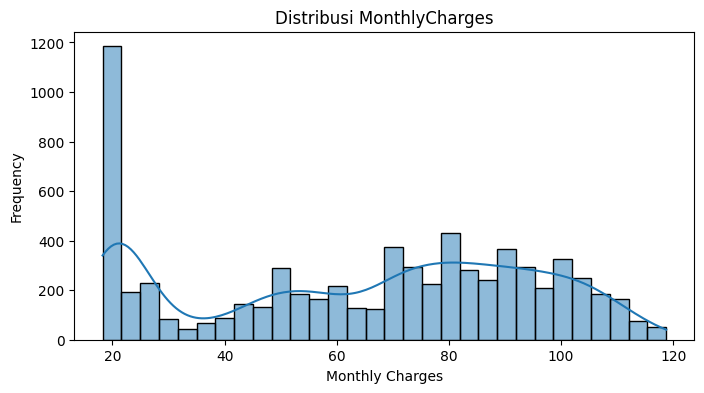

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(contract_data['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribusi MonthlyCharges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

In [ ]:
monthly_charges_stats = contract_data['MonthlyCharges'].describe(percentiles=[.25, .5, .75])

print("\nMonthlyCharges Statistics:")
print(monthly_charges_stats)


MonthlyCharges Statistics:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


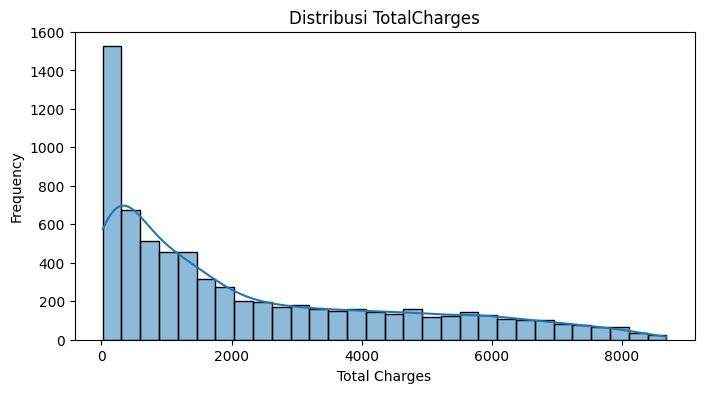

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(pd.to_numeric(contract_data['TotalCharges'], errors='coerce'), bins=30, kde=True)
plt.title('Distribusi TotalCharges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

In [ ]:
total_charges_stats = pd.to_numeric(contract_data['TotalCharges'], errors='coerce').describe(percentiles=[.25, .5, .75])

print("\nTotalCharges Statistics:")
print(total_charges_stats)


TotalCharges Statistics:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


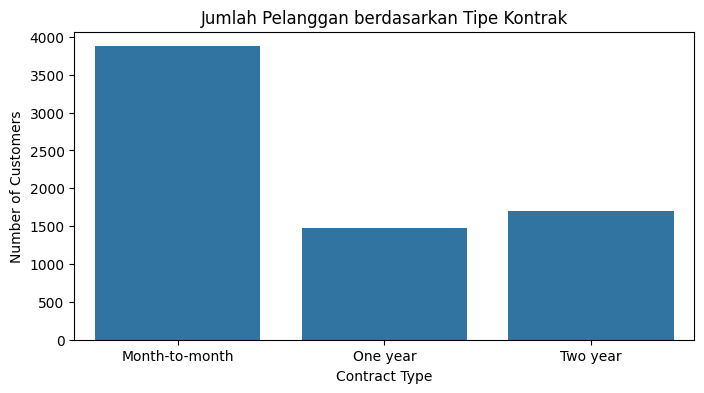

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=contract_data, x='Type')
plt.title('Jumlah Pelanggan berdasarkan Tipe Kontrak')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
# Summary statistik untuk 'Type'
type_counts = contract_data['Type'].value_counts()
print("\nType Counts:")
print(type_counts)


Type Counts:
Type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


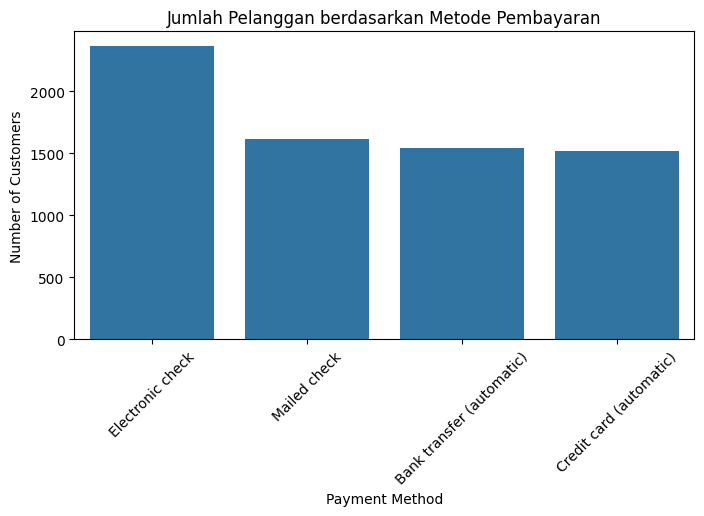

In [ ]:
# Plot metode pembayaran
plt.figure(figsize=(8, 4))
sns.countplot(data=contract_data, x='PaymentMethod')
plt.title('Jumlah Pelanggan berdasarkan Metode Pembayaran')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Summary statistik untuk 'PaymentMethod'
payment_method_counts = contract_data['PaymentMethod'].value_counts()
print("\nPayment Method Counts:")
print(payment_method_counts)


Payment Method Counts:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


In [ ]:
contract_data.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

#### **EDA `contract_data` Conclusion**

- Customer Preferences:

  - Customers prefer month-to-month contracts, suggesting a need for flexibility and perhaps uncertainty about long-term commitment.
  
  - Payment methods indicate a significant portion of customers prefer electronic checks, which could be due to ease of use or familiarity.

- Revenue Insights:
  - Monthly charges have a wide range, with most customers paying between \$20 and $100. The higher charges likely correspond to additional services or features.
  - Total charges suggest that while many customers have relatively low total charges, there are customers with very high total charges, indicating long-term or heavy usage.

- Retention Strategies:

  - Understanding that most customers prefer flexible contracts can help tailor retention strategies, such as offering incentives for longer-term commitments.
  - Payment method preferences can be used to streamline billing processes and offer targeted promotions.


#### `internet_data` Analysis

In [ ]:
internet_data.describe(include='all')

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


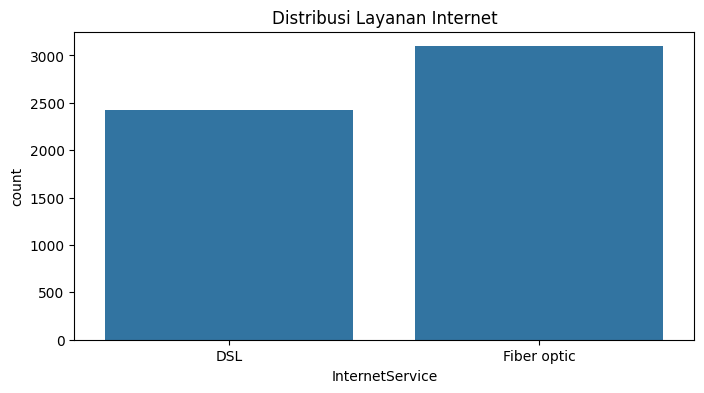

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=internet_data, x='InternetService')
plt.title('Distribusi Layanan Internet')
plt.show()

In [ ]:
inetservice_counts = internet_data['InternetService'].value_counts()
print("\nInternet Service Counts:")
print(inetservice_counts)


Internet Service Counts:
InternetService
Fiber optic    3096
DSL            2421
Name: count, dtype: int64


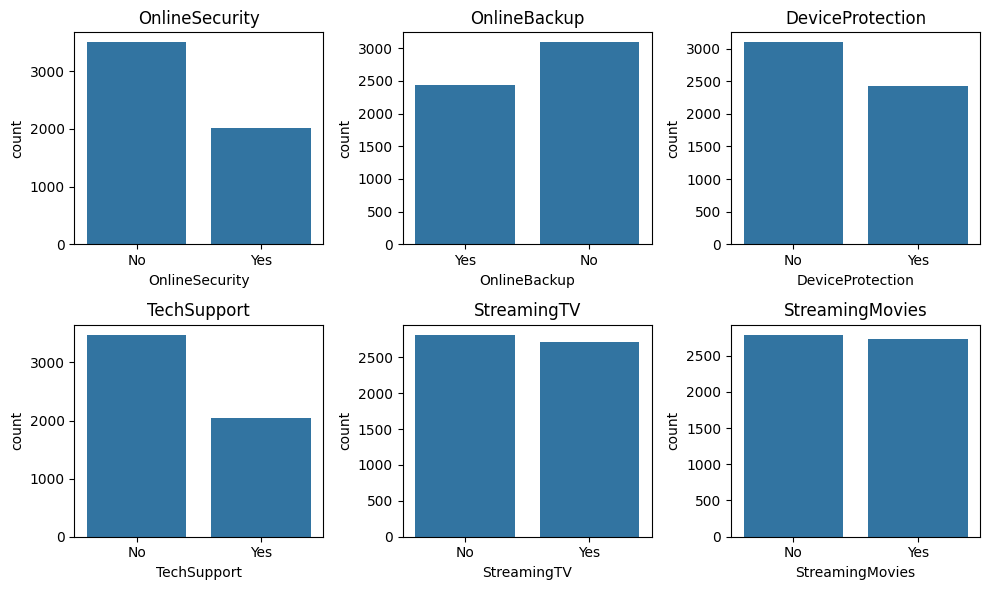

In [ ]:
# Plot layanan tambahan
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for i, service in enumerate(services):
    row = i // 3
    col = i % 3
    sns.countplot(data=internet_data, x=service, ax=axes[row, col])
    axes[row, col].set_title(service)

plt.tight_layout()
plt.show()

In [ ]:
# Display statistics
for service in services:
    counts = internet_data[service].value_counts()
    print(f'Statistics for {service}:')
    print(counts)
    print()

Statistics for OnlineSecurity:
OnlineSecurity
No     3498
Yes    2019
Name: count, dtype: int64

Statistics for OnlineBackup:
OnlineBackup
No     3088
Yes    2429
Name: count, dtype: int64

Statistics for DeviceProtection:
DeviceProtection
No     3095
Yes    2422
Name: count, dtype: int64

Statistics for TechSupport:
TechSupport
No     3473
Yes    2044
Name: count, dtype: int64

Statistics for StreamingTV:
StreamingTV
No     2810
Yes    2707
Name: count, dtype: int64

Statistics for StreamingMovies:
StreamingMovies
No     2785
Yes    2732
Name: count, dtype: int64



In [ ]:
internet_data.isnull().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

#### **EDA `internet_data` Conclusion**

- The dataset contains information on 5517 customers.
- Two types of Internet services are provided: Fiber optic and DSL, where the majority of customers (about 56%) have opted for Fiber optic Internet service.
- Among the additional services offered by Interconnect, a significant portion of customers has chosen not to use them.
- The countplots for OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies show that the majority of customers have opted not to subscribe to these services.

Overall, the analysis suggests that while Fiber optic is the preferred Internet service among customers, there is relatively low adoption of additional services.

#### `personal_data` Analysis

In [ ]:
print(personal_data.describe(include='all'))

        customerID gender  SeniorCitizen Partner Dependents
count         7043   7043    7043.000000    7043       7043
unique        7043      2            NaN       2          2
top     7590-VHVEG   Male            NaN      No         No
freq             1   3555            NaN    3641       4933
mean           NaN    NaN       0.162147     NaN        NaN
std            NaN    NaN       0.368612     NaN        NaN
min            NaN    NaN       0.000000     NaN        NaN
25%            NaN    NaN       0.000000     NaN        NaN
50%            NaN    NaN       0.000000     NaN        NaN
75%            NaN    NaN       0.000000     NaN        NaN
max            NaN    NaN       1.000000     NaN        NaN


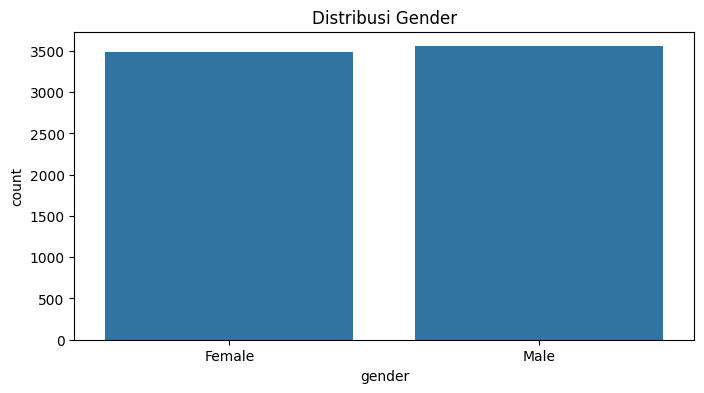

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=personal_data, x='gender')
plt.title('Distribusi Gender')
plt.show()

In [ ]:
gender_counts = personal_data['gender'].value_counts()
print("Gender Counts:")
print(gender_counts)

Gender Counts:
gender
Male      3555
Female    3488
Name: count, dtype: int64


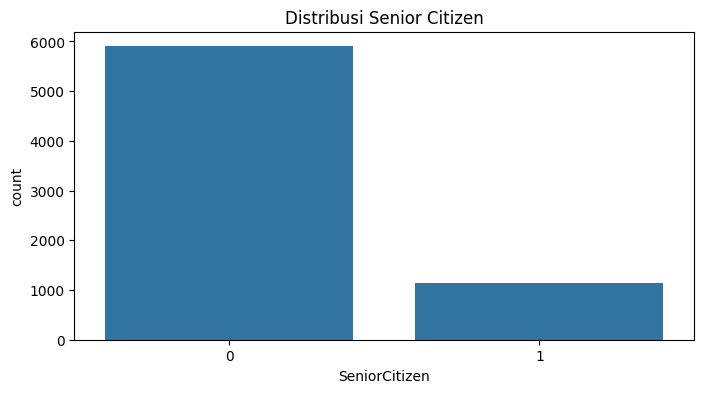

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=personal_data, x='SeniorCitizen')
plt.title('Distribusi Senior Citizen')
plt.show()

In [ ]:
seniorcitizen_counts = personal_data['SeniorCitizen'].value_counts()
print("Senior Citizen Counts:")
print(seniorcitizen_counts)

Senior Citizen Counts:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


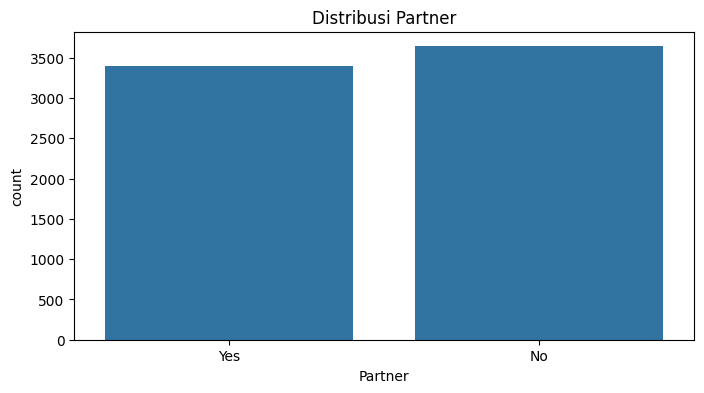

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=personal_data, x='Partner')
plt.title('Distribusi Partner')
plt.show()

In [ ]:
partner_counts = personal_data['Partner'].value_counts()
print("Partner Counts:")
print(partner_counts)

Partner Counts:
Partner
No     3641
Yes    3402
Name: count, dtype: int64


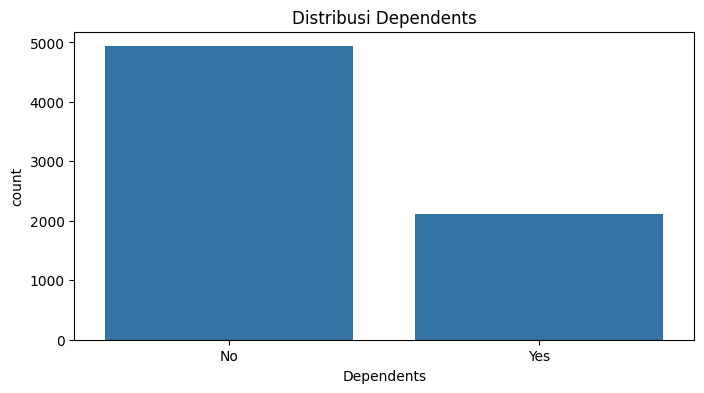

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=personal_data, x='Dependents')
plt.title('Distribusi Dependents')
plt.show()

In [ ]:
dependents_counts = personal_data['Dependents'].value_counts()
print("Dependents Counts:")
print(dependents_counts)

Dependents Counts:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


In [ ]:
personal_data.isnull().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

#### **EDA `personal_data` Conclusion**

- Gender Distribution:
  - The dataset contains information on 7043 customers, with approximately an equal number of male and female customers.
  - Gender distribution is almost balanced, with 3555 male customers and 3488 female customers.

- Senior Citizen Distribution:
  - Senior citizens constitute a minority in the dataset, with only 1142 out of 7043 customers being classified as senior citizens.
  - The majority of customers (5901 out of 7043) are not senior citizens.

- Partner and Dependents Distribution:
  - There is a relatively balanced distribution between customers with and without partners, with 3402 customers having partners and 3641 customers not having partners.
  - However, there is a significant imbalance in the distribution of customers with and without dependents. The majority of customers (4933 out of 7043) do not have dependents, while only 2110 customers have dependents.

Overall, the analysis provides insights into the demographic characteristics of the customers, including their gender, age (as indicated by senior citizen status), and family status (as indicated by partner and dependent status).

#### `phone_data` Analysis

In [ ]:
print(phone_data.describe(include='all'))

        customerID MultipleLines
count         6361          6361
unique        6361             2
top     5575-GNVDE            No
freq             1          3390


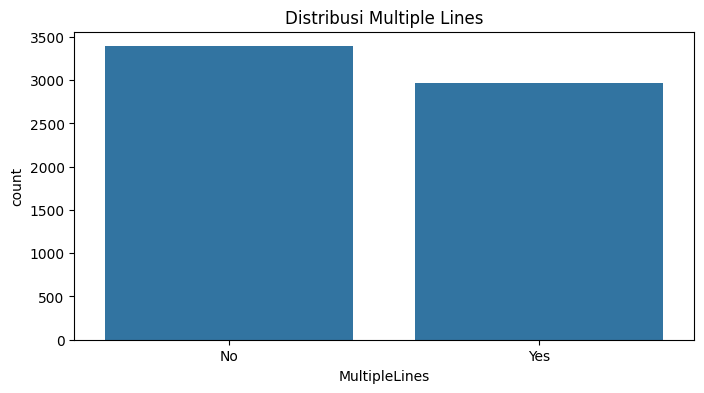

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=phone_data, x='MultipleLines')
plt.title('Distribusi Multiple Lines')
plt.show()

In [ ]:
multiplelines_counts = phone_data['MultipleLines'].value_counts()
print("MultipleLines Counts:")
print(multiplelines_counts)

MultipleLines Counts:
MultipleLines
No     3390
Yes    2971
Name: count, dtype: int64


In [ ]:
phone_data.isnull().sum()

customerID       0
MultipleLines    0
dtype: int64

#### **EDA `phone_data` Conclusion**

- The dataset contains information on 6361 customers.
- The distribution of customers with and without multiple lines is relatively balanced, with 3390 customers having single lines (No) and 2971 customers having multiple lines (Yes).

Overall, the analysis provides insights into the distribution of phone service usage among customers, particularly in terms of having multiple lines.

#### **Overall Initial EDA Conclusion**

- **Customer Preferences and Revenue Insights:**

  In the contract_data, customers show a preference for month-to-month contracts and electronic check payments. Monthly charges vary widely, with a significant number of customers paying between \$20 and $100, while total charges indicate a mix of low and high total expenses.

- **Retention Strategies and Internet Service Usage:**

  internet_data analysis reveals a preference for Fiber optic internet service, with additional services like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies being less frequently subscribed to. This suggests potential areas for improving service uptake or tailoring offerings.

- **Demographic Insights:**

  In personal_data, the gender distribution is almost equal, with a slight majority of male customers. Senior citizens are a minority, and there's a significant imbalance between customers with and without dependents, indicating potential targeting opportunities based on family status.

- **Phone Service Usage:**

  Analysis of phone_data shows a relatively balanced distribution of customers with single and multiple phone lines, indicating diverse preferences in phone service usage.

### **Project Work Plan**

- **Data Cleaning and Preprocessing**

  - Column Type Convertion
  - Handle Missing Value
  - Categorical Feature Encoding

- **Data Integration**

  - Integrate the 4 datasets into a combined single dataset according `customerID` that contain all relevant information
  - Ensure there is no duplicated data after integration

- **Further Data Preprocessing**

  - Perform Feature Engineering, such as creation of new columns to contain the subscription duration

- **Further Exploratory Data Analysis (EDA)**

  - Analyze the Numerical and Categorical feature distribution
  - Handle any identified outlier in integrated dataset
  - Visualize any relationships between each features to determine the insightful pattern

- **Model Selection and Training**

  - Split the integrated data into train set and test set
  - The model selected for this project:
      - Logistic Regression
      - Random Forest
      - Gradient Boosting Machines (GBM)
    
    The model start with the Logistic Regression as a baseline and continued with Random Forest and GBM then perform k-Fold Cross Validation to ensure the model doesn't overfit
    
- **Model Evaluation**
  
  Evaluate the model with several metrics which are:
    - Accuracy
    - F1-Score
    - AUC-ROC
    - Confusion Matrix

- **Hyperparameter Tuning**

  Perform hyperparameter tuning with GridCV or RandomizedSearchCV technique to identify the best parameter for the models.

- **Final Report and Presentation**

  - Create a final Jupyter Notebook report with the whole work plan structure
  - Create a presentation deck that provide a detailed and clear conclusion towards the audience.

### **Data Cleaning and Preprocessing**

Fill missing values for 'TotalCharges'

In [ ]:
contract_data['TotalCharges'] = pd.to_numeric(contract_data['TotalCharges'], errors='coerce')

Handle the missing value of `TotalCharges` by drop it

In [ ]:
contract_data.dropna(inplace=True)
contract_data.reset_index(drop=True, inplace=True)

In [ ]:
contract_data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
contract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 439.6+ KB


### **Data Integration**

In [ ]:
com1 = pd.merge(contract_data, personal_data, on='customerID', how='left')

In [ ]:
com1.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,Male,0,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No


In [ ]:
com1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7032 non-null   object        
 9   SeniorCitizen     7032 non-null   int64         
 10  Partner           7032 non-null   object        
 11  Dependents        7032 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 659.4+ KB


In [ ]:
com2 = pd.merge(com1, internet_data, on='customerID', how='left')

In [ ]:
com2.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No


In [ ]:
com2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7032 non-null   object        
 9   SeniorCitizen     7032 non-null   int64         
 10  Partner           7032 non-null   object        
 11  Dependents        7032 non-null   object        
 12  InternetService   5512 non-null   object        
 13  OnlineSecurity    5512 non-null   object        
 14  OnlineBackup      5512 n

In [ ]:
final_data = pd.merge(com2, phone_data, on='customerID', how='left')

In [ ]:
final_data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7032 non-null   object        
 9   SeniorCitizen     7032 non-null   int64         
 10  Partner           7032 non-null   object        
 11  Dependents        7032 non-null   object        
 12  InternetService   5512 non-null   object        
 13  OnlineSecurity    5512 non-null   object        
 14  OnlineBackup      5512 n

### **Further Data Preprocessing**

#### Feature Engineering

In [ ]:
final_data['Churned'] = final_data['EndDate'].apply(lambda x: 0 if x == pd.to_datetime('2020-02-01') else 1)

In [ ]:
final_data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churned
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,DSL,No,Yes,No,No,No,No,NaN,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,1
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,NaN,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,1


In [ ]:
final_data['SubscriptionDuration'] = (final_data['EndDate'] - final_data['BeginDate']).dt.days

In [ ]:
final_data.drop(['BeginDate', 'EndDate'], axis=1, inplace=True)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7032 non-null   object 
 1   Type                  7032 non-null   object 
 2   PaperlessBilling      7032 non-null   object 
 3   PaymentMethod         7032 non-null   object 
 4   MonthlyCharges        7032 non-null   float64
 5   TotalCharges          7032 non-null   float64
 6   gender                7032 non-null   object 
 7   SeniorCitizen         7032 non-null   int64  
 8   Partner               7032 non-null   object 
 9   Dependents            7032 non-null   object 
 10  InternetService       5512 non-null   object 
 11  OnlineSecurity        5512 non-null   object 
 12  OnlineBackup          5512 non-null   object 
 13  DeviceProtection      5512 non-null   object 
 14  TechSupport           5512 non-null   object 
 15  StreamingTV          

#### Handle Remaining Missing Value

In [ ]:
final_data.isnull().sum()

customerID                 0
Type                       0
PaperlessBilling           0
PaymentMethod              0
MonthlyCharges             0
TotalCharges               0
gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
InternetService         1520
OnlineSecurity          1520
OnlineBackup            1520
DeviceProtection        1520
TechSupport             1520
StreamingTV             1520
StreamingMovies         1520
MultipleLines            680
Churned                    0
SubscriptionDuration       0
dtype: int64

From the integration process, it seems there are some missing value that caused by the different number of rows from all 4 data.

In [ ]:
missing_values = final_data.isnull().sum()
total_values = final_data.shape[0]
percentage_missing = (missing_values / total_values) * 100

print("Percentage of missing values:")
print(percentage_missing)

Percentage of missing values:
customerID               0.000000
Type                     0.000000
PaperlessBilling         0.000000
PaymentMethod            0.000000
MonthlyCharges           0.000000
TotalCharges             0.000000
gender                   0.000000
SeniorCitizen            0.000000
Partner                  0.000000
Dependents               0.000000
InternetService         21.615472
OnlineSecurity          21.615472
OnlineBackup            21.615472
DeviceProtection        21.615472
TechSupport             21.615472
StreamingTV             21.615472
StreamingMovies         21.615472
MultipleLines            9.670080
Churned                  0.000000
SubscriptionDuration     0.000000
dtype: float64


The amount of missing value is more than 5% hence it is not feasible to drop them. Since the all the missing value columns are in categorical type, the appropriate imputation will be impute it with value `No`

In [ ]:
str_col = final_data.columns[final_data.dtypes == 'object']
final_data[str_col] = final_data[str_col].fillna("No")

In [ ]:
final_data.isnull().sum()

customerID              0
Type                    0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
MultipleLines           0
Churned                 0
SubscriptionDuration    0
dtype: int64

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7032 non-null   object 
 1   Type                  7032 non-null   object 
 2   PaperlessBilling      7032 non-null   object 
 3   PaymentMethod         7032 non-null   object 
 4   MonthlyCharges        7032 non-null   float64
 5   TotalCharges          7032 non-null   float64
 6   gender                7032 non-null   object 
 7   SeniorCitizen         7032 non-null   int64  
 8   Partner               7032 non-null   object 
 9   Dependents            7032 non-null   object 
 10  InternetService       7032 non-null   object 
 11  OnlineSecurity        7032 non-null   object 
 12  OnlineBackup          7032 non-null   object 
 13  DeviceProtection      7032 non-null   object 
 14  TechSupport           7032 non-null   object 
 15  StreamingTV          

In [ ]:
final_data.head()

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churned,SubscriptionDuration
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,0,31
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0,1036
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,1,61
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,0,1371
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,1,61


### **Further Exploratory Data Analysis (EDA)**

#### **Categorical Data Comparison**

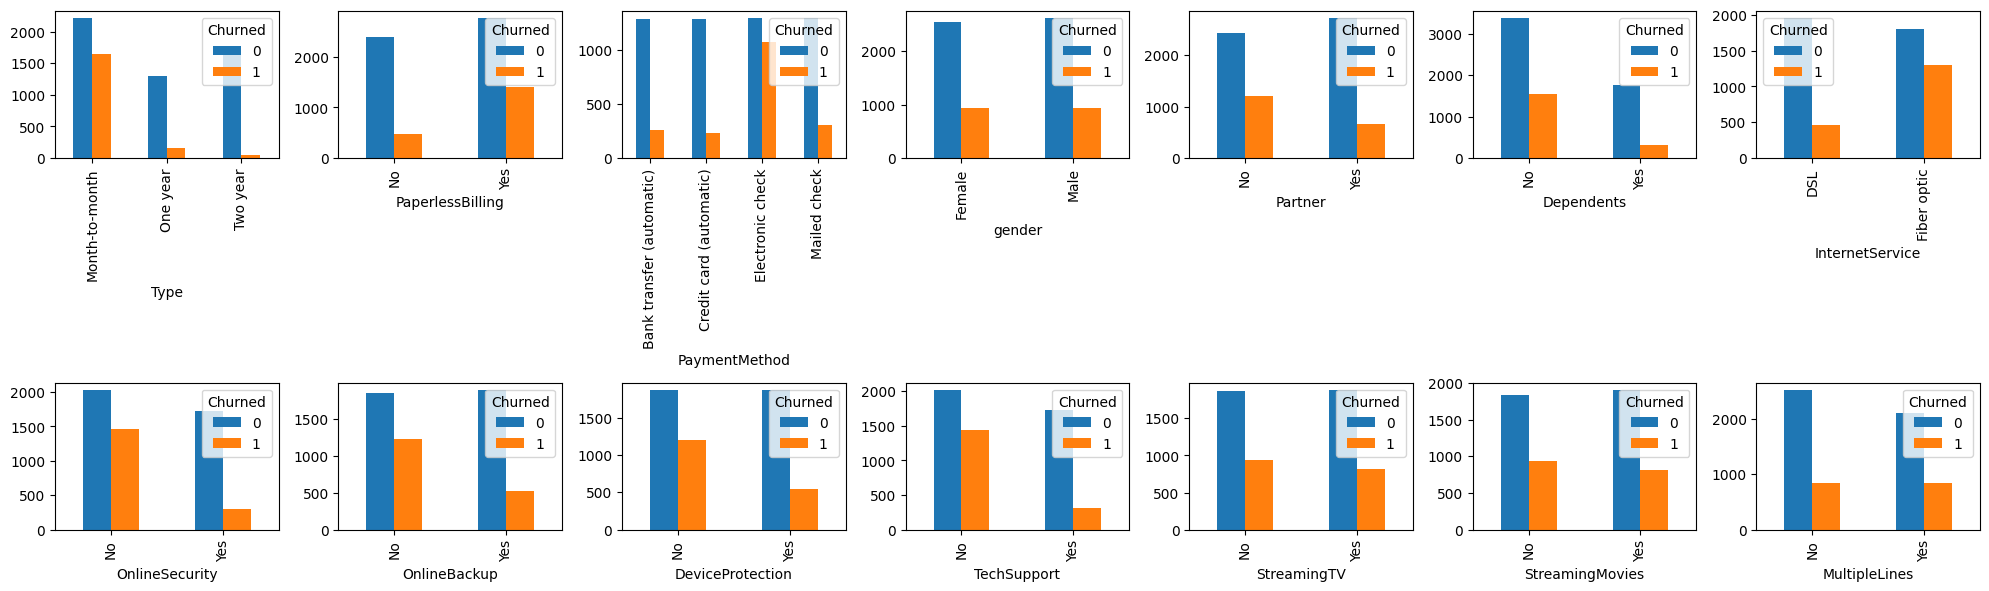

In [ ]:
# create client bar chart on categorical data
col = list(final_data.columns[final_data.dtypes == 'object'])
col.remove('customerID')
fig, ax = plt.subplots(2, len(col)//2, figsize=(20,6))
ax = ax.flatten()
for c, a in zip(col, ax):
    data = final_data.groupby([c, 'Churned'])['Churned'].count().unstack()
    data.plot(kind='bar', ax=a,)
plt.tight_layout()
plt.show()

In [ ]:
for column in col:
    # Calculate and display value counts
    value_counts = final_data[column].value_counts()
    print(f"Statistics for {column}:")
    print(value_counts)
    print("\n")

Statistics for Type:
Type
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64


Statistics for PaperlessBilling:
PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64


Statistics for PaymentMethod:
PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64


Statistics for gender:
gender
Male      3549
Female    3483
Name: count, dtype: int64


Statistics for Partner:
Partner
No     3639
Yes    3393
Name: count, dtype: int64


Statistics for Dependents:
Dependents
No     4933
Yes    2099
Name: count, dtype: int64


Statistics for InternetService:
InternetService
Fiber optic    3096
DSL            2416
Name: count, dtype: int64


Statistics for OnlineSecurity:
OnlineSecurity
No     3497
Yes    2015
Name: count, dtype: int64


Statistics for OnlineBackup:
OnlineBackup
No     3087
Yes    2425
Name: count, dtype: int64

**Active Subscriber Clients:**
- Clients generally prefer monthly subscriptions and favor paperless billing.
- The majority use DSL for their internet services.
- Many do not use both internet and phone services simultaneously.
- The male subscriber base is larger compared to the female subscriber base.

**Churned Clients:**
- Similar to active subscribers, they favor monthly payments, opt for paperless billing, and often use electronic checks for payments.
- Most churned clients use fiber optic for internet services, with relatively few utilizing additional services.
- Phone service usage is also low among these clients.
- There are slightly fewer female clients than male clients among those who have churned.

#### **Numerical Data Comparison**

In [ ]:
numerical_columns = ['MonthlyCharges', 'TotalCharges', 'SubscriptionDuration']

In [ ]:
final_data[numerical_columns].describe()

,MonthlyCharges,TotalCharges,SubscriptionDuration
count,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,987.538538
std,30.085974,2266.771362,747.153663
min,18.250000,18.800000,30.000000
25%,35.587500,401.450000,275.000000
50%,70.350000,1397.475000,883.000000
75%,89.862500,3794.737500,1676.000000
max,118.750000,8684.800000,2191.000000


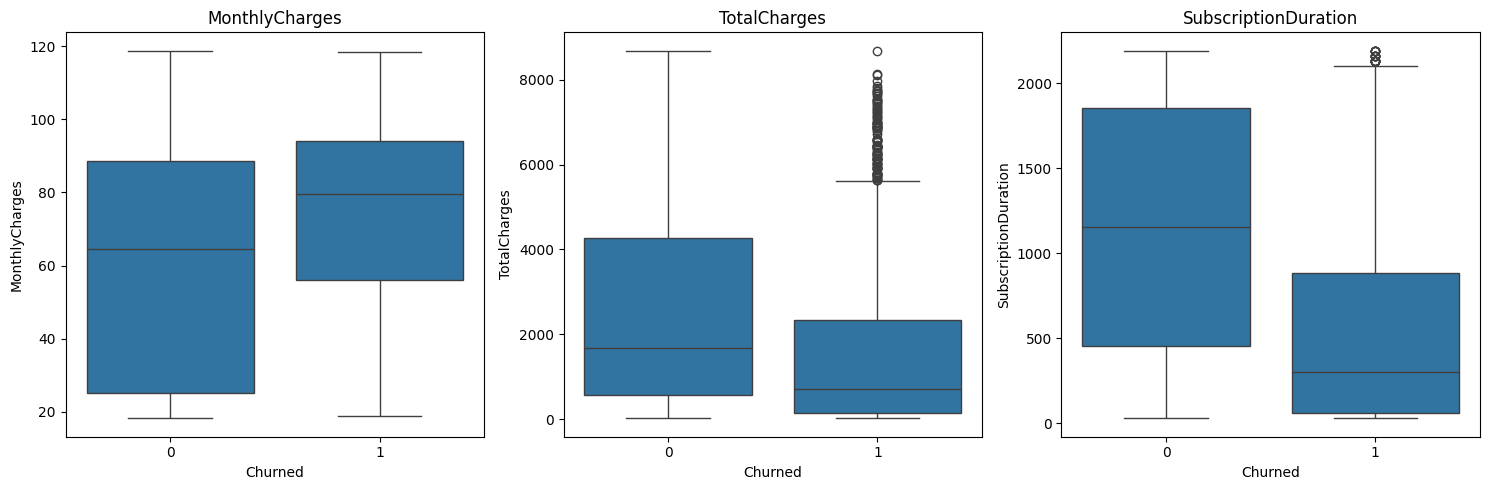

In [ ]:
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(15, 5))
for i, column in enumerate(numerical_columns):
    sns.boxplot(final_data, x='Churned', y=column, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Churned')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

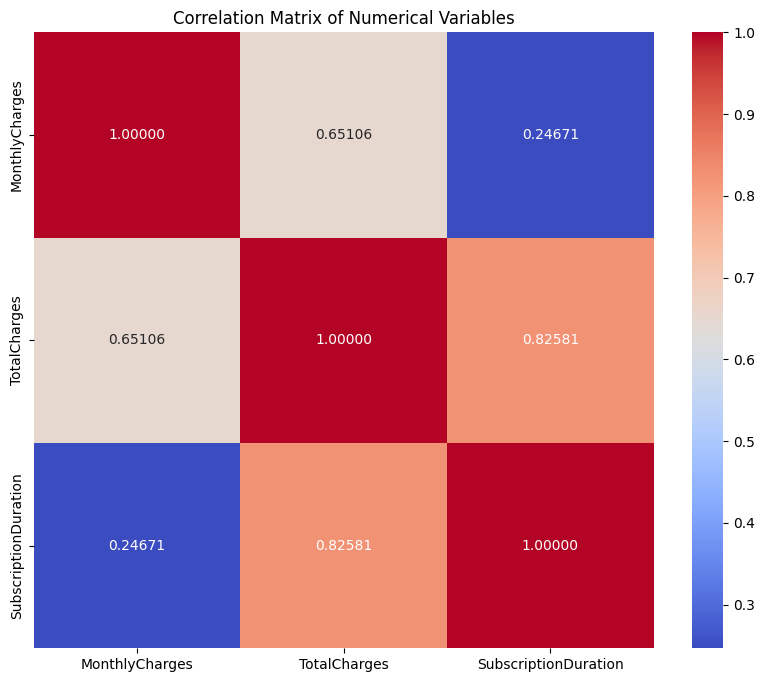

In [ ]:
correlation_matrix = final_data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

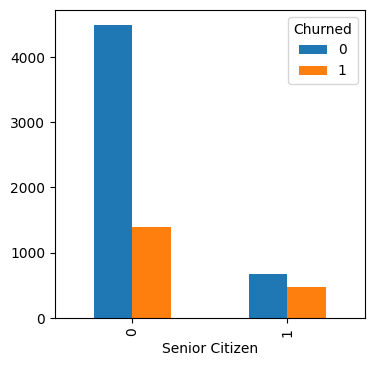

In [ ]:
citizen = final_data.groupby(['SeniorCitizen', 'Churned'])['Churned'].count().unstack()
citizen.plot(kind='bar', figsize=(4,4))
plt.xlabel('Senior Citizen')
plt.show()

**Active Subscriber Clients:**
- The majority of clients opt for monthly payments in the MonthlyCharges column, with payments typically averaging around the 60s.
- In the TotalCharges column, as many clients remain subscribed, there's a trend towards higher values, reflecting the cumulative payments over time.
- Clients who haven't churned show longer subscription durations, with an average of around 1000 days in the Days column.
- A notable proportion of clients are identified as senior citizens in the SeniorCitizen column.

**Churned Clients:**
- In the MonthlyCharges column, churned clients tend to make larger payments
compared to their subscribed counterparts.
- Total charges for churned clients are typically lower since they haven't stayed subscribed as long.
- The average subscription duration for churned clients is less than 500 days in the Days column.
- Among churned clients, there's a lack of senior citizens, as indicated in the SeniorCitizen column.


From the correlation matrix, there's a strong positive connection between TotalCharges and both MonthlyCharges and SubscriptionDuration, meaning clients with higher monthly fees tend to have longer subscriptions and accumulate higher total charges. However, the link between MonthlyCharges and SubscriptionDuration is weaker.

#### **Churned Client**

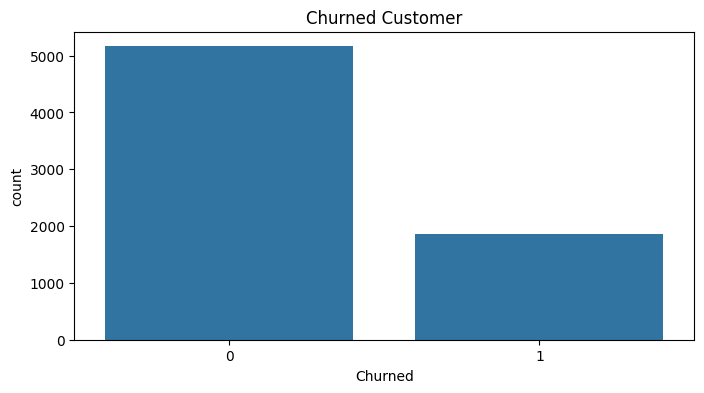

Churned
0    5163
1    1869
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(final_data, x='Churned')
plt.title('Churned Customer')
plt.show()

churned_counts = final_data['Churned'].value_counts()
print(churned_counts)

The table indicates that there are more clients who have not churned, approximately more than 5000, and fewer clients who have already churned, less than 2000. It's clear that there is an imbalanced class here, which will affect the model's performance later on.

#### **Service Comparison**

In [ ]:
internet_service = final_data[final_data['customerID'].isin(internet_data['customerID'])]
phone_service = final_data[final_data['customerID'].isin(phone_data['customerID'])]

In [ ]:
# Descriptions for churned = 0
internet_churned_0_desc = internet_service[internet_service['Churned'] == 0]['MonthlyCharges'].describe()
phone_churned_0_desc = phone_service[phone_service['Churned'] == 0]['MonthlyCharges'].describe()

# Descriptions for churned = 1
internet_churned_1_desc = internet_service[internet_service['Churned'] == 1]['MonthlyCharges'].describe()
phone_churned_1_desc = phone_service[phone_service['Churned'] == 1]['MonthlyCharges'].describe()

# Combine descriptions into a single table
combined_desc = pd.concat([internet_churned_0_desc, internet_churned_1_desc,
                           phone_churned_0_desc, phone_churned_1_desc],
                          axis=1,
                          keys=['Internet (Churned=0)', 'Internet (Churned=1)',
                                'Phone (Churned=0)', 'Phone (Churned=1)'])

combined_desc

,Internet (Churned=0),Internet (Churned=1),Phone (Churned=0),Phone (Churned=1)
count,3756.000000,1756.000000,4653.000000,1699.000000
mean,76.356709,77.920985,63.261552,78.134255
std,22.272199,21.144147,31.934310,22.567643
min,24.150000,23.450000,18.250000,18.850000
25%,59.137500,69.350000,24.500000,69.975000
50%,78.725000,80.450000,69.900000,80.950000
75%,94.312500,94.650000,90.050000,94.850000
max,118.750000,118.350000,118.750000,118.350000


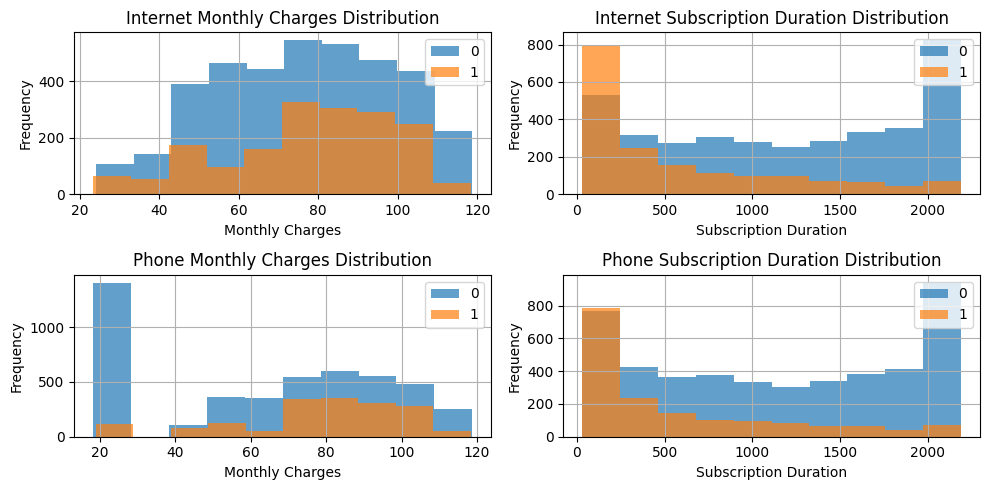

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
internet_service[internet_service['Churned'] == 0]['MonthlyCharges'].hist(bins=10, alpha=0.7, ax=axes[0, 0], label=0)
internet_service[internet_service['Churned'] == 1]['MonthlyCharges'].hist(bins=10, alpha=0.7, ax=axes[0, 0], label=1)
axes[0,0].legend(loc="upper right")
axes[0,0].set_xlabel("Monthly Charges")
axes[0,0].set_ylabel("Frequency")
axes[0,0].set_title("Internet Monthly Charges Distribution")

internet_service[internet_service['Churned']==0]['SubscriptionDuration'].hist(bins=10, alpha=0.7, ax=axes[0, 1], label=0)
internet_service[internet_service['Churned']==1]['SubscriptionDuration'].hist(bins=10, alpha=0.7, ax=axes[0, 1], label=1)
axes[0,1].legend(loc="upper right")
axes[0,1].set_xlabel("Subscription Duration")
axes[0,1].set_ylabel("Frequency")
axes[0,1].set_title("Internet Subscription Duration Distribution")

phone_service[phone_service['Churned'] == 0]['MonthlyCharges'].hist(bins=10, alpha=0.7, ax=axes[1, 0], label=0)
phone_service[phone_service['Churned'] == 1]['MonthlyCharges'].hist(bins=10, alpha=0.7, ax=axes[1, 0], label=1)
axes[1,0].legend(loc="upper right")
axes[1,0].set_xlabel("Monthly Charges")
axes[1,0].set_ylabel("Frequency")
axes[1,0].set_title("Phone Monthly Charges Distribution")

phone_service[phone_service['Churned']==0]['SubscriptionDuration'].hist(bins=10, alpha=0.7, ax=axes[1, 1], label=0)
phone_service[phone_service['Churned']==1]['SubscriptionDuration'].hist(bins=10, alpha=0.7, ax=axes[1, 1], label=1)
axes[1,1].legend(loc="upper right")
axes[1,1].set_xlabel("Subscription Duration")
axes[1,1].set_ylabel("Frequency")
axes[1,1].set_title("Phone Subscription Duration Distribution")


plt.tight_layout()
plt.show()


**Internet Service:**

- Many clients pay around the 80s for their monthly internet charges.
- The distribution of monthly charges is nearly identical between clients who stay and those who leave, with similar averages and ranges.
- Most clients subscribe to internet services for less than 500 days.
- Clients who have churned generally spent an average of around 566 days subscribed, with most churned clients having subscribed for about 83 days.
- Clients who churned predominantly had monthly subscriptions.

**Phone Service:**

- Clients generally choose the lowest monthly fee, around the 20s.
- Clients who leave tend to pay around 80, whereas clients who stay pay between 24 and 90, and those who leave pay between 69 and 94.
- Clients generally spend around 200 days subscribed to phone services.
- Both staying and leaving clients have an average subscription duration of about 200 days.
- Clients who stay tend to have longer subscription durations, around 2000 days, influenced by long-term subscribers.

### **Overall EDA Conclusion**

- **Categorical Data:**

  Active subscribers tend to prefer monthly subscriptions and paperless billing, with most using DSL internet. Few use both internet and phone services, and there are more male subscribers than female. Churned clients share similar preferences for monthly payments and paperless billing but predominantly use fiber optic internet with low additional service usage. There are slightly fewer females among churned clients.

- **Numerical Data:**

  Active subscribers pay an average of $60 monthly, have higher total charges due to longer subscriptions (averaging around 1000 days), and many are senior citizens. Churned clients have higher monthly charges, lower total charges due to shorter subscription durations (less than 500 days), and no senior citizens among them.

- **Correlation:**

  There is a strong positive correlation between TotalCharges and both MonthlyCharges and SubscriptionDuration, while the correlation between MonthlyCharges and SubscriptionDuration is weaker.

- **Churned Clients:**

  The dataset shows more active subscribers (over 5000) than churned clients (less than 2000), indicating an imbalanced class.

- **Service Comparison:**

  For internet service, monthly charges are around \$80 for both active and churned clients, with most subscriptions lasting less than 500 days. Churned clients averaged 566 days, mainly on monthly plans. For phone service, clients typically choose the lowest monthly fee around \$20. Churned clients pay around \$80, while active clients pay between \$24 and $90. The average subscription duration is around 200 days, with long-term subscribers staying around 2000 days.

### **Business Analysis**

#### **Business Feature Engineering**

Create a copy of `final_data` dataframe to avoid any data corruption in the final data for modeling  

In [ ]:
business_data = final_data.copy()

To retrieve insights from the data, the business_data will be applied by several business analysis logics and techniques.
These techniques are:
- CLTV Analysis
- RFM Classification

Convert the existing `SubscriptionDuration` column into monthly value and assign it towards `SubscriptionDurationMonths` new column.

In [ ]:
business_data['SubscriptionDurationMonths'] = business_data['SubscriptionDuration'] / 30

#### **Customer Lifetime Value (CLTV)**

Customer Lifetime Value (CLTV) is a metric used to estimate the total revenue a business can expect from a single customer over the entire duration of their relationship. It is crucial for implementing CLTV as it helps businesses understand the long-term value of their customers, enabling them to allocate resources effectively and prioritize customer retention efforts. By calculating components such as ***Average Purchase Value***, ***Purchase Frequency***, ***Average Customer Lifespan***, and ***Churn Rate***, businesses can gain insights into customer behavior and make data-driven decisions to maximize profitability and enhance customer relationships.

The formula for CLTV that could be implemented is:

$$ CLTV = \frac{(Average Purchase Value \times Purchase Frequency \times Average Customer Lifespan)}{Churn Rate} $$

The components are:

- **Average Purchase Value (APV)**: The average amount of money a customer spends on each purchase. This can be calculated by dividing the total revenue by the total number of purchases.

  $$ APV = \frac{Total Revenue}{Total Number of Purchases} $$

- **Purchase Frequency (PF)**: The average number of purchases made by a customer over a certain period of time. This can be calculated by dividing the total number of purchases by the total number of unique customers.

  $$ PF = \frac{Total Number of Purchases}{Total Number of Unique Customers} $$

- **Average Customer Lifespan (ACL)**: The average length of time a customer remains active with the company. This can be calculated by averaging the time between the first purchase and the last purchase for each customer.

  $$ ACL = \frac{1}{N} \sum_{i=1}^{N} \text{SubscriptionDurationMonths}_i $$

- **Churn Rate (CR)**: The rate at which customers stop doing business with the company over a certain period of time. This can be calculated by dividing the number of customers lost during a certain period by the total number of customers at the beginning of that period.

  $$ CR = \frac{Number of Customers Lost}{Total Number of Customers at the Beginning} $$

Calculate Average Purchase Value (APV)

In [ ]:
business_data['apv'] = business_data['TotalCharges'] / business_data['SubscriptionDurationMonths']

Calculate Purchase Frequency (PF)

In [ ]:
business_data['pf'] =  business_data['SubscriptionDuration'] / business_data['customerID'].nunique()

Calculate Average Customer Lifespan (ACL)

In [ ]:
acl = business_data['SubscriptionDurationMonths'].mean()
print("Average Customer Lifetime (ACL):", acl)

Average Customer Lifetime (ACL): 32.91795127038301


Determine Churn Rate (CR), by assuming churned customers are those with `Churned` column value of 1

In [ ]:
total_churned = business_data[business_data['Churned'] == 1]['customerID'].nunique()
initial_customers = business_data['customerID'].nunique()
cr = total_churned / initial_customers
print("Customer Retention Rate (CR):", cr)

Customer Retention Rate (CR): 0.26578498293515357


Calculate CLTV using the formula

In [ ]:
business_data['CLTV'] = (business_data['apv'] * business_data['pf'] * acl) / cr

Define thresholds for categorization


In [ ]:
threshold_1 = business_data['CLTV'].quantile(0.25)
threshold_2 = business_data['CLTV'].quantile(0.45)
threshold_3 = business_data['CLTV'].quantile(0.65)
threshold_4 = business_data['CLTV'].quantile(0.85)

Define bins based on the prepared thresholds for CLTV segmentation

In [ ]:
bins = [-float('inf'), threshold_1, threshold_2, threshold_3, threshold_4, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

Create a new column 'CLTV_Category' based on binning

In [ ]:
business_data['CLTV_category'] = pd.cut(business_data['CLTV'], bins=bins, labels=labels)

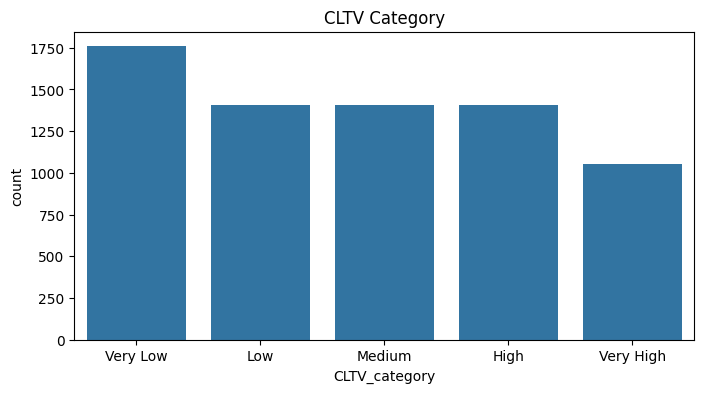

CLTV_category
Very Low     1758
Medium       1407
Low          1406
High         1406
Very High    1055
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(business_data, x='CLTV_category')
plt.title('CLTV Category')
plt.show()

cltv_cat_counts = business_data['CLTV_category'].value_counts()
print(cltv_cat_counts)

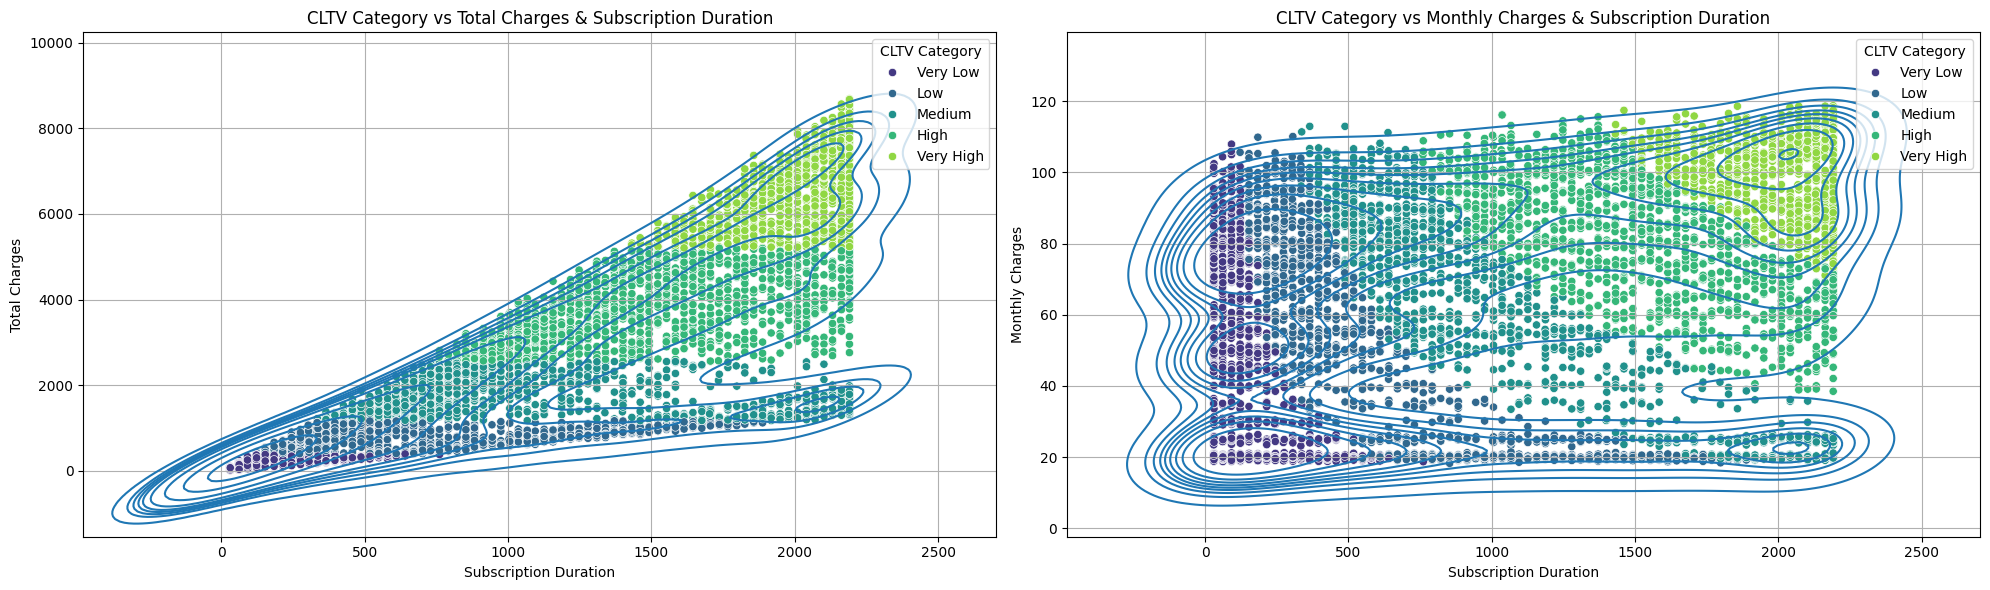

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot 1: Subscription Duration vs Total Charges by CLTV Category
plt.subplot(1, 2, 1)
sns.scatterplot(data=business_data, x='SubscriptionDuration', y='TotalCharges', hue='CLTV_category', palette='viridis')
plt.title('CLTV Category vs Total Charges & Subscription Duration')
plt.xlabel('Subscription Duration')
plt.ylabel('Total Charges')
plt.grid(True)
plt.legend(title='CLTV Category')

# add contour lines
sns.kdeplot(data=business_data, x='SubscriptionDuration', y='TotalCharges', fill=False, ax=plt.gca())

# Plot 2: Subscription Duration vs Monthly Charges by CLTV Category
plt.subplot(1, 2, 2)
sns.scatterplot(data=business_data, x='SubscriptionDuration', y='MonthlyCharges', hue='CLTV_category', palette='viridis')
plt.title('CLTV Category vs Monthly Charges & Subscription Duration')
plt.xlabel('Subscription Duration')
plt.ylabel('Monthly Charges')
plt.grid(True)
plt.legend(title='CLTV Category')

# add contour lines
sns.kdeplot(data=business_data, x='SubscriptionDuration', y='MonthlyCharges', fill=False, ax=plt.gca())

plt.tight_layout()
plt.show()


From the CLTV analysis, there are several key findings which are:

- The average customer lifetime was calculated to be approximately 32.92 months. This indicates that, on average, customers stay subscribed for nearly 33 months, providing a significant window for revenue generation.

- The customer retention rate was found to be approximately 26.6%. This means that around 26.6% of the customers are retained, while the rest are lost over time. Improving this rate can substantially enhance overall business performance.

- The calculated CLTV values were then categorized into five categories: Very Low, Low, Medium, High, and Very High. The distribution of customers across the CLTV categories is as follows:
  - Very Low:  1758 customers
  - Low: 1406 customers
  - Medium: 1407 customers
  - High: 1406 customers
  - Very High: 1055 customers

  This distribution suggests that a significant portion of customers falls into the 'Very Low' category, while the 'Very High' category has the fewest customers.
  

#### **RFM Analysis**

RFM (Recency, Frequency, Monetary) analysis is a marketing technique used to segment customers based on their transactional behavior.

- **Recency**: This component focuses on how recently a customer has made a purchase. It helps identify customers who are more likely to respond to promotions or retain them from churning.
  
- **Frequency**: This component measures how often a customer makes purchases within a given period. It identifies loyal and regular customers who contribute significantly to revenue.
  
- **Monetary**: This component reflects the monetary value of a customer's transactions. It helps differentiate between high-spending and low-spending customers, guiding strategies for upselling or cross-selling.

By analyzing these components together, businesses can gain insights into customer behavior, tailor marketing strategies, and prioritize efforts to maximize profitability and customer satisfaction.

There are 3 logics in these analysis:

1. **Recency Logic**:
   
   This function categorizes customers based on their recency of activity, specifically focusing on their subscription duration and churn status.
   
   If a customer has churned (Churned == 1), they are categorized based on their SubscriptionDuration:
    - Customers with a `SubscriptionDuration` less than 500 days are assigned label 1.
    - Customers with a `SubscriptionDuration` of 500 days or more are assigned label 2.
   
   If a customer has not churned (Churned == 0), they are categorized as follows:
    - Customers with a `SubscriptionDuration` less than 500 days are assigned label 1.
    - Customers with a `SubscriptionDuration` between 500 and 1750 days are assigned label 3.
    - Customers with a `SubscriptionDuration` greater than 1750 days are assigned label 4.

2. **Frequency Logic**:

   This function categorizes customers based on their purchase frequency (`pf`).
   - Customers with a `pf` less than 0.05 are assigned label 1.
   - Customers with a `pf` between 0.05 and 0.15 are assigned label 2.
   - Customers with a `pf` between 0.15 and 0.25 are assigned label 3.
   - Customers with a `pf` greater than 0.25 are assigned label 4.

3. **Monetary Logic**:
   
   This function categorizes customers based on their total charges.
   - Customers with `TotalCharges` less than \$1500 are assigned label 1.
   - Customers with `TotalCharges` between \$1500 and \$4000 are assigned label 2.
   - Customers with `TotalCharges` between \$4000 and \$6000 are assigned label 3.
   - Customers with `TotalCharges` greater than \$6000 are assigned label 4.

Create a function for the ***Recency*** logic

In [ ]:
def recency_label(row):
    if row['Churned'] == 1:
        if row['SubscriptionDuration'] < 500:
            return 1
        else:
            return 2
    else:
        if row['SubscriptionDuration'] < 500:
            return 1
        elif 500 <= row['SubscriptionDuration'] < 1750:
            return 3
        else:
            return 4

Create a function for the ***Frequency*** logic

In [ ]:
def frequency_label(pf):
    if pf < 0.05:
        return 1
    elif 0.05 <= pf < 0.15:
        return 2
    elif 0.15 <= pf < 0.25:
        return 3
    else:
        return 4

Create a function for the ***Monetary*** logic

In [ ]:
def monetary_label(total_charges):
    if total_charges < 1500:
        return 1
    elif 1500 <= total_charges < 4000:
        return 2
    elif 4000 <= total_charges < 6000:
        return 3
    else:
        return 4

Apply all 3 logics to the `business_data` data

In [ ]:
business_data['recency_tier'] = business_data.apply(recency_label, axis=1)
business_data['frequency_tier'] = business_data['pf'].apply(frequency_label)
business_data['monetary_tier'] = business_data['TotalCharges'].apply(monetary_label)

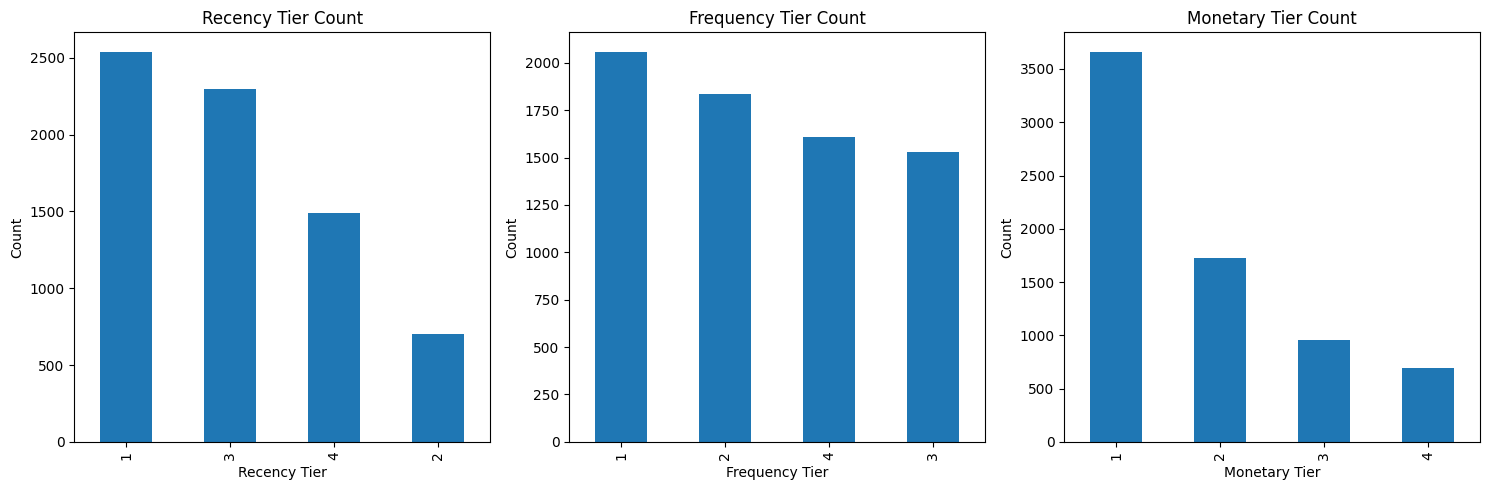

Recency Tier Counts:
recency_tier
1    2539
3    2296
4    1492
2     705
Name: count, dtype: int64

Frequency Tier Counts:
frequency_tier
1    2058
2    1835
4    1610
3    1529
Name: count, dtype: int64

Monetary Tier Counts:
monetary_tier
1    3661
2    1723
3     956
4     692
Name: count, dtype: int64


In [ ]:
recency_tier_count = business_data['recency_tier'].value_counts()
frequency_tier_count = business_data['frequency_tier'].value_counts()
monetary_tier_count = business_data['monetary_tier'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

recency_tier_plot = recency_tier_count.plot(kind='bar', ax=axes[0], title='Recency Tier Count', xlabel='Recency Tier', ylabel='Count')
frequency_tier_plot = frequency_tier_count.plot(kind='bar', ax=axes[1], title='Frequency Tier Count', xlabel='Frequency Tier', ylabel='Count')
monetary_tier_plot = monetary_tier_count.plot(kind='bar', ax=axes[2], title='Monetary Tier Count', xlabel='Monetary Tier', ylabel='Count')

plt.tight_layout()
plt.show()

print("Recency Tier Counts:")
print(recency_tier_count)
print()
print("Frequency Tier Counts:")
print(frequency_tier_count)
print()
print("Monetary Tier Counts:")
print(monetary_tier_count)

In [ ]:
business_data['rfm_score'] = business_data['recency_tier'].astype(str) + '-' + \
                             business_data['frequency_tier'].astype(str) + '-' + \
                             business_data['monetary_tier'].astype(str)

In [ ]:
business_data.head()

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,...,SubscriptionDuration,SubscriptionDurationMonths,apv,pf,CLTV,CLTV_category,recency_tier,frequency_tier,monetary_tier,rfm_score
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,...,31,1.033333,28.887097,0.004408,15.772084,Very Low,1,1,1,1-1-1
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,...,1036,34.533333,54.715251,0.147327,998.370288,Medium,3,2,2,3-2-2
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,...,61,2.033333,53.188525,0.008675,57.144084,Very Low,1,1,1,1-1-1
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,...,1371,45.700000,40.278993,0.194966,972.611859,Medium,3,3,2,3-3-2
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,...,61,2.033333,74.581967,0.008675,80.128528,Very Low,1,1,1,1-1-1


In [ ]:
def categorize_customers(rfm_score):
    recency, frequency, monetary = map(int, rfm_score.split('-'))

    if recency >= 3 and frequency >= 3 and monetary >= 3:
        return 'Premier Clients'
    elif (recency >= 2 and frequency >= 2 and monetary >= 3) or (recency >= 3 and frequency >= 2 and monetary >= 2) or (recency >= 2 and frequency >= 3 and monetary >= 2):
        return 'Loyal Clients'
    elif (recency >= 2 and frequency >= 2 and monetary == 1) or (recency >= 2 and frequency == 1 and monetary >= 2) or (recency == 1 and frequency >= 2 and monetary >= 2):
        return 'Prospective Clients'
    elif (recency <= 2 and frequency >= 2 and monetary >= 2) or (recency >= 2 and frequency <= 2 and monetary >= 2) or (recency >= 2 and frequency >= 2 and monetary <= 2):
        return 'Cautionary Clients'
    else:
        return 'Dormant Clients'

In [ ]:
business_data['rfm_category'] = business_data['rfm_score'].apply(categorize_customers)

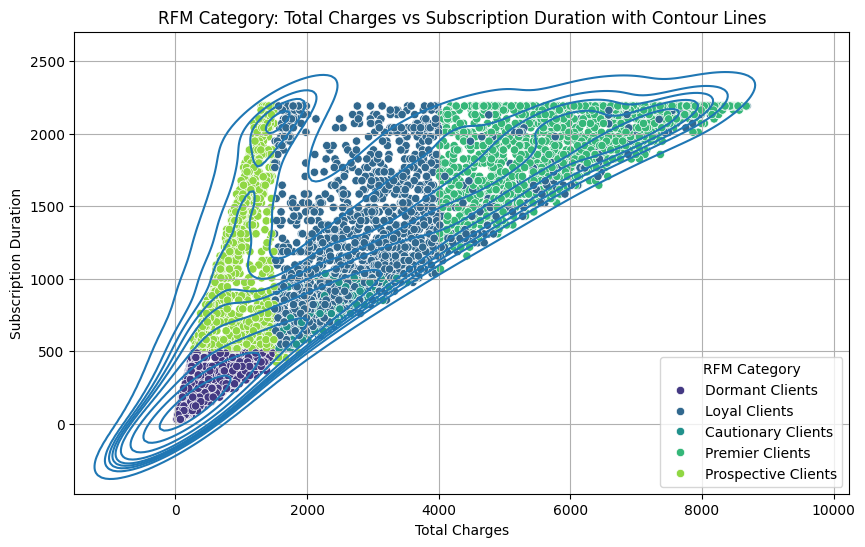

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=business_data, x='TotalCharges', y='SubscriptionDuration', hue='rfm_category', palette='viridis')
plt.title('RFM Category: Total Charges vs Subscription Duration with Contour Lines')
plt.xlabel('Total Charges')
plt.ylabel('Subscription Duration')
plt.grid(True)
plt.legend(title='RFM Category')

sns.kdeplot(data=business_data, x='TotalCharges', y='SubscriptionDuration', fill=False, ax=plt.gca())

plt.show()


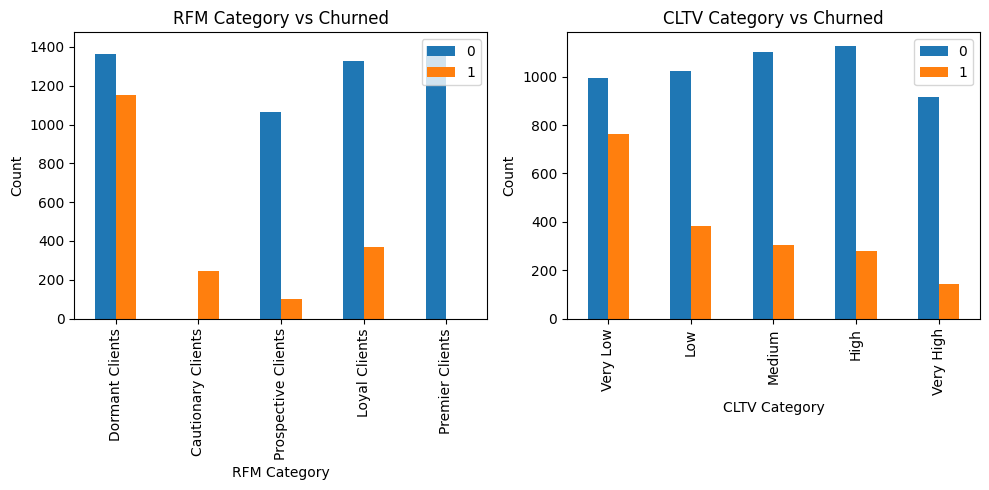

CLTV_category
Very Low     1758
Medium       1407
Low          1406
High         1406
Very High    1055
Name: count, dtype: int64

rfm_category
Dormant Clients        2519
Loyal Clients          1699
Premier Clients        1405
Prospective Clients    1162
Cautionary Clients      247
Name: count, dtype: int64


In [ ]:
cltv_order = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
cltv_count = business_data.groupby(['CLTV_category', 'Churned'])['Churned'].count().unstack()
cltv_count = cltv_count.reindex(cltv_order)

rfm_order = ['Dormant Clients', 'Cautionary Clients', 'Prospective Clients', 'Loyal Clients', 'Premier Clients']
rfm_count = business_data.groupby(['rfm_category', 'Churned'])['Churned'].count().unstack()
rfm_count = rfm_count.reindex(rfm_order)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

rfm_plot = rfm_count.plot(kind='bar', ax=axes[0], title='RFM Category vs Churned', xlabel='RFM Category', ylabel='Count')
rfm_plot.legend(loc='upper right')

cltv_plot = cltv_count.plot(kind='bar', ax=axes[1], title='CLTV Category vs Churned', xlabel='CLTV Category', ylabel='Count')
cltv_plot.legend(loc='upper right')

plt.tight_layout()
plt.show()

print(business_data['CLTV_category'].value_counts())
print()
print(business_data['rfm_category'].value_counts())


In [ ]:
print(business_data['CLTV_category'].value_counts())
print()
print(business_data['rfm_category'].value_counts())

CLTV_category
Very Low     1758
Medium       1407
Low          1406
High         1406
Very High    1055
Name: count, dtype: int64

rfm_category
Dormant Clients        2519
Loyal Clients          1699
Premier Clients        1405
Prospective Clients    1162
Cautionary Clients      247
Name: count, dtype: int64


The analysis applied RFM (Recency, Frequency, and Monetary) scoring to categorize customers and assess their value and behavior patterns. Here's a detailed breakdown of the findings:

- The distribution of recency tiers shows that most customers fall into Tier 1 (2539 customers) and Tier 3 (2296 customers).

- The distribution of frequency tiers shows that most customers fall into Tier 1 (2058 customers) and Tier 2 (1835 customers).

- The distribution of monetary tiers shows that most customers fall into Tier 1 (3661 customers) and Tier 2 (1723 customers).

Customers were categorized into five distinct segments based on their RFM scores:
- Dormant Clients: 2519 customers
- Cautionary Clients: 247 customers
- Prospective Clients: 1162 customers
- Loyal Clients: 1699 customers
- Premier Clients: 1405 customers

The distribution of RFM categories shows that most customers fall into the ***Dormant Clients*** category (2519 customers) and ***Loyal Clients*** category (1699 customers).

### **Business Strategy Recommendation**

- **Retention Focus**: Customers in the **`Very Low`** and **`Low`** CLTV categories and **`Dormant Clients`** RFM category can be targeted with retention campaigns to increase their value over time.

- **Upsell and Cross-Sell**: Customers in the **`High`** and **`Very High`** CLTV categories and **`Premier Clients`** RFM category can be targeted with upsell or cross-sell promotions to maximize their lifetime value.

- **Segmentation and Personalization**: The analysis allows for better segmentation of the customer base, enabling more personalized marketing and service strategies tailored to each RFM and CLTV category, enhancing customer satisfaction and loyalty.

## **Model Development**

#### **Preparation**

From the Preprocessing and EDA phase, the variables that will be used in the model are:

**Features:**
* `Type`
* `PaperlessBilling`
* `PaymentMethod`
* `MonthlyCharges`
* `TotalCharges`
* `SeniorCitizen`
* `Partner`
* `Dependents`
* `InternetService`
* `OnlineSecurity`
* `OnlineBackup`
* `DeviceProtection`
* `TechSupport`
* `StreamingTV`
* `StreamingMovies`
* `MultipleLines`   
* `SubscriptionDuration`

**Target:**
* `Churned`


##### **Data Transformation**

Drop unused features from the existing data

In [ ]:
used_data = final_data.drop(['customerID', 'gender'], axis=1)

In [ ]:
used_data.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churned,SubscriptionDuration
0,Month-to-month,Yes,Electronic check,29.85,29.85,0,Yes,No,DSL,No,Yes,No,No,No,No,No,0,31
1,One year,No,Mailed check,56.95,1889.50,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0,1036
2,Month-to-month,Yes,Mailed check,53.85,108.15,0,No,No,DSL,Yes,Yes,No,No,No,No,No,1,61
3,One year,No,Bank transfer (automatic),42.30,1840.75,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,0,1371
4,Month-to-month,Yes,Electronic check,70.70,151.65,0,No,No,Fiber optic,No,No,No,No,No,No,No,1,61


To handle the imbalanced data, the data will be balanced through up-sampling technique, which will be assign through function

In [ ]:
# upsampling function
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

Since the proposed model algorithms work only with numerical data where the process is by implementing mathematical equiation to make the prediction. all the remaining categorical feature in the data required to be converted to numerical values by using ***label encoding*** technique.

Initialize the LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

Get the category columns

In [ ]:
category_columns = used_data.select_dtypes(include=['object']).columns

Encode each category column

In [ ]:
for col in category_columns:
    used_data[col] = label_encoder.fit_transform(used_data[col])

In [ ]:
used_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  7032 non-null   int64  
 1   PaperlessBilling      7032 non-null   int64  
 2   PaymentMethod         7032 non-null   int64  
 3   MonthlyCharges        7032 non-null   float64
 4   TotalCharges          7032 non-null   float64
 5   SeniorCitizen         7032 non-null   int64  
 6   Partner               7032 non-null   int64  
 7   Dependents            7032 non-null   int64  
 8   InternetService       7032 non-null   int64  
 9   OnlineSecurity        7032 non-null   int64  
 10  OnlineBackup          7032 non-null   int64  
 11  DeviceProtection      7032 non-null   int64  
 12  TechSupport           7032 non-null   int64  
 13  StreamingTV           7032 non-null   int64  
 14  StreamingMovies       7032 non-null   int64  
 15  MultipleLines        

##### **Split the Data**

In [ ]:
features = used_data.drop(['Churned'], axis=1)
target = used_data['Churned']

The data will be splited 80% for training and 20% for testing

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)

In [ ]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(5625, 17)
(1407, 17)
(5625,)
(1407,)


In [ ]:
target_train.value_counts()

Churned
0    4139
1    1486
Name: count, dtype: int64

In [ ]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 5)
print(features_upsampled.shape)
print(target_upsampled.shape)

(11569, 17)
(11569,)


In [ ]:
numeric = ['MonthlyCharges', 'TotalCharges', 'SubscriptionDuration']
scaler = StandardScaler()
scaler.fit(features_upsampled[numeric])

features_upsampled[numeric] = scaler.transform(features_upsampled[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [ ]:
features_upsampled.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,SubscriptionDuration
5594,0,1,1,-0.757406,-0.871891,0,0,0,0,1,0,0,0,0,0,0,-1.029611
2239,1,1,3,-0.191448,0.083610,0,0,0,0,1,1,0,1,0,0,1,0.378002
2119,0,1,2,-1.604552,-0.847631,0,1,0,0,0,0,0,0,0,0,0,-0.858396
5456,1,1,3,-0.490546,-0.167214,0,0,0,0,0,1,1,0,0,0,0,0.038378
2562,0,1,2,0.931513,1.795026,0,1,0,1,0,1,1,0,1,0,1,1.489496


#### **Model Selection and Training**

The model selected for this project are Logistic Regression (LR), Random Forest Classifier (RFC), and Gradient Boosting Machine (GBM)

**Logistic Regression (LR):**
Logistic Regression is a statistical model for binary classification that predicts the probability of an outcome using a logistic function. It’s suitable for classification tasks because it provides interpretable coefficients and predicts probabilities, offering insights into the importance and influence of each feature.

**Random Forest Classifier (RFC):**
Random Forest is an ensemble method that builds multiple decision trees on random subsets of data and features, combining their predictions for improved accuracy and reduced over-fitting. It’s ideal for classification due to its robustness, ability to handle high-dimensional data, and feature importance scores.

**Gradient Boosting Machine (GBM):**
Gradient Boosting Machine is an ensemble technique that sequentially builds models, each correcting errors from the previous ones. It excels in classification tasks by combining weak models to form a strong predictor, capturing complex patterns in the data. GBM’s flexibility and tuning capabilities result in high predictive accuracy.

These models are suitable for classification due to their strengths: Logistic Regression offers simplicity and interpretability, Random Forest provides robustness and handles complexity, and Gradient Boosting achieves high accuracy by correcting its own errors.

##### **Logistic Regression**

In [ ]:
lr_model = LogisticRegression(random_state=12345)

In [ ]:
lr_model.fit(features_upsampled, target_upsampled)


LogisticRegression(random_state=12345)

##### **Random Forest Classifier**

In [ ]:
rfc_model = RandomForestClassifier(random_state=12345)

In [ ]:
rfc_model.fit(features_upsampled, target_upsampled)

RandomForestClassifier(random_state=12345)

##### **Gradient Boosting Machine**

In [ ]:
gbm_model = GradientBoostingClassifier(random_state=12345)

In [ ]:
gbm_model.fit(features_upsampled, target_upsampled)

GradientBoostingClassifier(random_state=12345)

#### **Basic Model Testing and Evaluation**

In [ ]:
def evaluate_model(model, features_test, target_test):
    predictions = model.predict(features_test)
    probs = model.predict_proba(features_test)[:, 1]

    accuracy = accuracy_score(target_test, predictions)
    f1 = f1_score(target_test, predictions)
    conf_matrix = confusion_matrix(target_test, predictions)
    class_report = classification_report(target_test, predictions)
    auc_roc = roc_auc_score(target_test, probs)

    return accuracy, f1, conf_matrix, class_report, auc_roc

In [ ]:
# Logistic Regression
lr_accuracy, lr_f1_score, lr_conf_matrix, lr_class_report, lr_auc_roc = evaluate_model(lr_model, features_test, target_test)
print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("F1 Score:", lr_f1_score)
print("Confusion Matrix:\n", lr_conf_matrix)
print("Classification Report:\n", lr_class_report)
print("AUC-ROC Score:", lr_auc_roc)

# Random Forest Classifier
rfc_accuracy, rfc_f1_score, rfc_conf_matrix, rfc_class_report, rfc_auc_roc = evaluate_model(rfc_model, features_test, target_test)
print("\nRandom Forest Classifier:")
print("Accuracy:", rfc_accuracy)
print("F1 Score:", rfc_f1_score)
print("Confusion Matrix:\n", rfc_conf_matrix)
print("Classification Report:\n", rfc_class_report)
print("AUC-ROC Score:", rfc_auc_roc)

# Gradient Boosting Machine
gbm_accuracy, rgbm_f1_score, gbm_conf_matrix, gbm_class_report, gbm_auc_roc = evaluate_model(gbm_model, features_test, target_test)
print("\nGradient Boosting Machine:")
print("Accuracy:", gbm_accuracy)
print("F1 Score:", rgbm_f1_score)
print("Confusion Matrix:\n", gbm_conf_matrix)
print("Classification Report:\n", gbm_class_report)
print("AUC-ROC Score:", gbm_auc_roc)

Logistic Regression:
Accuracy: 0.6709310589907604
F1 Score: 0.6018916595012898
Confusion Matrix:
 [[594 430]
 [ 33 350]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.58      0.72      1024
           1       0.45      0.91      0.60       383

    accuracy                           0.67      1407
   macro avg       0.70      0.75      0.66      1407
weighted avg       0.81      0.67      0.69      1407

AUC-ROC Score: 0.8459925240698434

Random Forest Classifier:
Accuracy: 0.8059701492537313
F1 Score: 0.6393659180977542
Confusion Matrix:
 [[892 132]
 [141 242]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      1024
           1       0.65      0.63      0.64       383

    accuracy                           0.81      1407
   macro avg       0.76      0.75      0.75      1407
weighted avg       0.80      0.81      0.81      1407

AUC-ROC Score: 0

In [ ]:
# Get the predicted probabilities for the best models
lr_probs = lr_model.predict_proba(features_test)[:, 1]
rfc_probs = rfc_model.predict_proba(features_test)[:, 1]
gbm_probs = gbm_model.predict_proba(features_test)[:, 1]

# Calculate the FPR and TPR for each model
fpr_lr, tpr_lr, _ = roc_curve(target_test, lr_probs)
fpr_rfc, tpr_rfc, _ = roc_curve(target_test, rfc_probs)
fpr_gbm, tpr_gbm, _ = roc_curve(target_test, gbm_probs)

# Calculate the AUC for each model
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

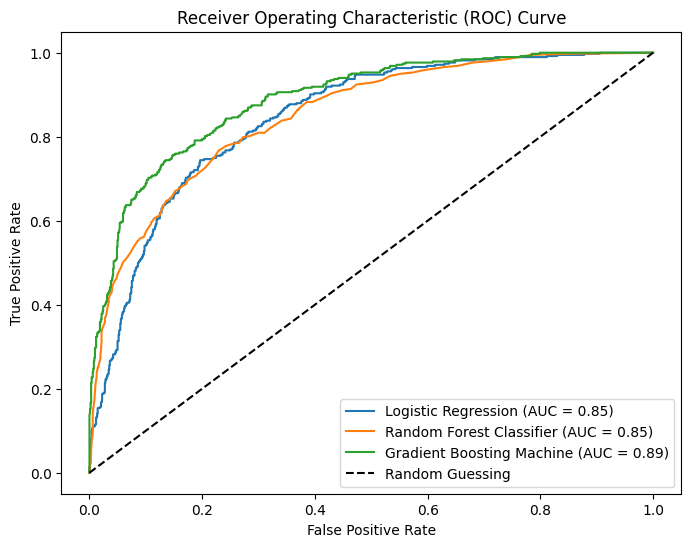

In [ ]:
# Visualize the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest Classifier (AUC = {roc_auc_rfc:.2f})')
plt.plot(fpr_gbm, tpr_gbm, label=f'Gradient Boosting Machine (AUC = {roc_auc_gbm:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### **Basic Model Evaluation Summary**

- The selected models that are used in the project are:
  - Logistic Regression
  - Random Forest Classifier
  - Gradient Boosting Machine

- For the **Logistic Regression** model, the evaluation metrics show an accuracy of 0.67, an F1-Score of 0.60, and an AUC-ROC score of 0.85. The confusion matrix indicates 594 true negatives, 430 false positives, 33 false negatives, and 350 true positives.
- The **Random Forest Classifier** achieved an accuracy of 0.81, an F1-Score of 0.64, and an AUC-ROC score of 0.85. Its confusion matrix shows 892 true negatives, 132 false positives, 141 false negatives, and 242 true positives.
- The **Gradient Boosting Machine** model demonstrated an accuracy of 0.73, an F1-Score of 0.65, and the highest AUC-ROC score of 0.89. The confusion matrix for this model contains 679 true negatives, 345 false positives, 36 false negatives, and 347 true positives.

From the ROC Curve, The Gradient Boosting Machine achieved the highest AUC-ROC score (0.89), followed by the Random Forest Classifier (0.85) and Logistic Regression (0.85), indicating superior performance in class distinction.

Despite slightly lower accuracy, the Gradient Boosting Machine outperforms others with the highest AUC-ROC score.
Logistic Regression exhibits decent performance but has a higher false positive rate compared to other models.

**Note**: *These models haven't been hyperparameter tuned yet hence the performance metrics represent the basic model evaluation. The hyperparameter tuning process will be executed subsequently to enhance model performance.*

#### **Hyperparameter Tuning**

Define the hyperparameter in the parameter grid for each model

In [ ]:
param_grid_lr = {
    'solver': ['liblinear', 'saga'],
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

param_grid_rfc = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

param_grid_gbm = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 4],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

Initialize GridSearchCV objects with StratifiedKFold cross-validation, where it mainly purposed for the cross-validation splits to ensure that each fold has the same proportion of each class as the full dataset.

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)

Initialize the GridSearchCV objects

In [ ]:
grid_search_lr = GridSearchCV(LogisticRegression(random_state=12345), param_grid_lr, cv=cv, scoring='roc_auc')
grid_search_rfc = GridSearchCV(RandomForestClassifier(random_state=12345), param_grid_rfc, cv=cv, scoring='roc_auc')
grid_search_gbm = GridSearchCV(GradientBoostingClassifier(random_state=12345), param_grid_gbm, cv=cv, scoring='roc_auc')

Fit the models

In [ ]:
grid_search_lr.fit(features_upsampled, target_upsampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12345, shuffle=True),
             estimator=LogisticRegression(random_state=12345),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='roc_auc')

In [ ]:
grid_search_rfc.fit(features_upsampled, target_upsampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12345, shuffle=True),
             estimator=RandomForestClassifier(random_state=12345),
             param_grid={'bootstrap': [True], 'max_depth': [10, 20],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc')

In [ ]:
grid_search_gbm.fit(features_upsampled, target_upsampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12345, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=12345),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 4],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc')

Find the best model with best estimator

In [ ]:
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best parameters for Random Forest Classifier:", grid_search_rfc.best_params_)
print("Best parameters for Gradient Boosting Machine:", grid_search_gbm.best_params_)

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best parameters for Random Forest Classifier: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best parameters for Gradient Boosting Machine: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150, 'subsample': 1.0}


In [ ]:
best_lr_model = grid_search_lr.best_estimator_
best_rfc_model = grid_search_rfc.best_estimator_
best_gbm_model = grid_search_gbm.best_estimator_

Evaluate on the test set

In [ ]:
# Logistic Regression
lr_accuracy, lr_f1_score, lr_conf_matrix, lr_class_report, lr_auc_roc = evaluate_model(best_lr_model, features_test, target_test)
print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("F1 Score:", lr_f1_score)
print("Confusion Matrix:\n", lr_conf_matrix)
print("Classification Report:\n", lr_class_report)
print("AUC-ROC Score:", lr_auc_roc)

# Random Forest Classifier
rfc_accuracy, rfc_f1_score, rfc_conf_matrix, rfc_class_report, rfc_auc_roc = evaluate_model(best_rfc_model, features_test, target_test)
print("\nRandom Forest Classifier:")
print("Accuracy:", rfc_accuracy)
print("F1 Score:", rfc_f1_score)
print("Confusion Matrix:\n", rfc_conf_matrix)
print("Classification Report:\n", rfc_class_report)
print("AUC-ROC Score:", rfc_auc_roc)

# Gradient Boosting Machine
gbm_accuracy, rgbm_f1_score, gbm_conf_matrix, gbm_class_report, gbm_auc_roc = evaluate_model(best_gbm_model, features_test, target_test)
print("\nGradient Boosting Machine:")
print("Accuracy:", gbm_accuracy)
print("F1 Score:", rgbm_f1_score)
print("Confusion Matrix:\n", gbm_conf_matrix)
print("Classification Report:\n", gbm_class_report)
print("AUC-ROC Score:", gbm_auc_roc)

Logistic Regression:
Accuracy: 0.6709310589907604
F1 Score: 0.6018916595012898
Confusion Matrix:
 [[594 430]
 [ 33 350]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.58      0.72      1024
           1       0.45      0.91      0.60       383

    accuracy                           0.67      1407
   macro avg       0.70      0.75      0.66      1407
weighted avg       0.81      0.67      0.69      1407

AUC-ROC Score: 0.8459415286390339

Random Forest Classifier:
Accuracy: 0.8059701492537313
F1 Score: 0.6431372549019607
Confusion Matrix:
 [[888 136]
 [137 246]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1024
           1       0.64      0.64      0.64       383

    accuracy                           0.81      1407
   macro avg       0.76      0.75      0.75      1407
weighted avg       0.81      0.81      0.81      1407

AUC-ROC Score: 0

In [ ]:
# Get the predicted probabilities for the best models
lr_probs_hy = best_lr_model.predict_proba(features_test)[:, 1]
rfc_probs_hy = best_rfc_model.predict_proba(features_test)[:, 1]
gbm_probs_hy = best_gbm_model.predict_proba(features_test)[:, 1]

# Calculate the FPR and TPR for each model
fpr_lr_hy, tpr_lr_hy, _ = roc_curve(target_test, lr_probs_hy)
fpr_rfc_hy, tpr_rfc_hy, _ = roc_curve(target_test, rfc_probs_hy)
fpr_gbm_hy, tpr_gbm_hy, _ = roc_curve(target_test, gbm_probs_hy)

# Calculate the AUC for each model
roc_auc_lr_hy = auc(fpr_lr_hy, tpr_lr_hy)
roc_auc_rfc_hy = auc(fpr_rfc_hy, tpr_rfc_hy)
roc_auc_gbm_hy = auc(fpr_gbm_hy, tpr_gbm_hy)

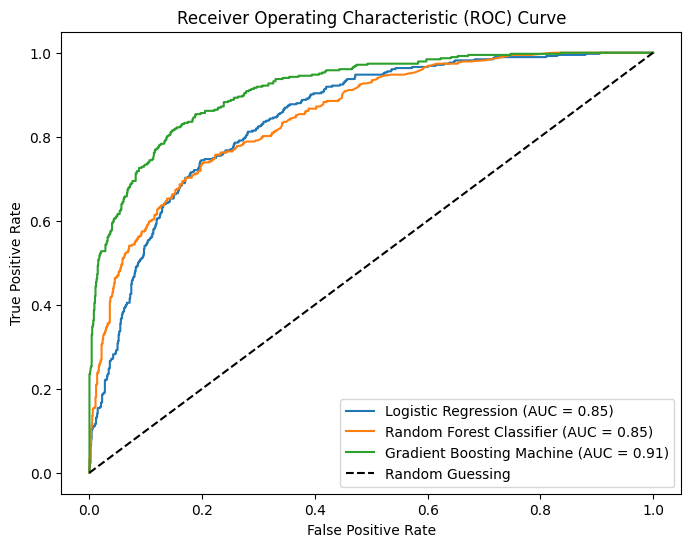

In [ ]:
# Visualize the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_hy, tpr_lr_hy, label=f'Logistic Regression (AUC = {roc_auc_lr_hy:.2f})')
plt.plot(fpr_rfc_hy, tpr_rfc_hy, label=f'Random Forest Classifier (AUC = {roc_auc_rfc_hy:.2f})')
plt.plot(fpr_gbm_hy, tpr_gbm_hy, label=f'Gradient Boosting Machine (AUC = {roc_auc_gbm_hy:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### **Final Model Evaluation Conclusion**

After hyperparameter tuning process, the models performance improved across to all models.

- **Logistic Regression** achieved an accuracy of 0.67 with an AUC-ROC score of 0.85, maintaining similar performance metrics as before tuning. However, the discovered optimized parameter for the model are:
  -  `C`: 10
  - `penalty`: l2
  - `solver`: saga

- **Random Forest Classifier** demonstrated enhanced performance with an accuracy of 0.81 and an AUC-ROC score of 0.85. The model's ability to distinguish between classes improved, as evidenced by the AUC-ROC score.
By using these optimized parameters:
  - `bootstrap`: True
  - `max_depth`: 20
  - `max_features`: sqrt
  - `min_samples_leaf`: 1
  - `min_samples_split`: 2
  - `n_estimators`: 150

- **Gradient Boosting Machine** exhibited substantial improvement, achieving an accuracy of 0.81 and the highest AUC-ROC score of 0.91 among the three models. This indicates superior performance in distinguishing between the positive and negative classes. Not only the model achieve the best score among the other, after the hypertuning process, the accuracy increased from 0.73 to 0.81 and the AUC-ROC score increased from 0.89 to 0.91. These performance achieved by utilizing the optimized parameters:
  - `learning_rate`: 0.2
  - `max_depth`: 4
  - `min_samples_leaf`: 2
  - `min_samples_split`: 10
  - `n_estimators`: 150
  - `subsample`: 1.0

Overall, the hyperparameter tuning process have significantly enhanced the models' predictive performance, with the Gradient Boosting Machine demonstrating the highest performance metrics, especially in terms of AUC-ROC score, after tuning.



## **Project Conclusion**

**Overall EDA**:
- **Categorical Data**: Active subscribers predominantly prefer monthly subscriptions and paperless billing, mainly using DSL internet. Few use both internet and phone services, with a higher proportion of male subscribers. Churned clients exhibit similar preferences but favor fiber optic internet and exhibit low additional service usage, with slightly fewer female subscribers.
- **Numerical Data**: Active subscribers have an average monthly payment of \$60, higher total charges due to longer subscriptions (around 1000 days), and many are senior citizens. In contrast, churned clients face higher monthly charges but lower total charges due to shorter subscription durations (less than 500 days), with no senior citizens among them.
- **Correlation**: There is a strong positive correlation between TotalCharges and both `MonthlyCharges` and `SubscriptionDuration`, while the correlation between `MonthlyCharges` and `SubscriptionDuration` is weaker.
- **Churned Clients**: The dataset reveals more active subscribers (over 5000) compared to churned clients (less than 2000), indicating *class imbalance*.
- **Service Comparison**: Internet service shows monthly charges around $80 for both active and churned clients, with most subscriptions lasting less than 500 days. Churned clients averaged 566 days, mostly on monthly plans. For phone service, clients typically choose the lowest monthly fee around \$20, with churned clients paying about \$80, while active clients pay between \$24 and \$90. The average subscription duration is around 200 days, with long-term subscribers staying around 2000 days.

**CLTV Analysis**:
- The average customer lifetime (ACL) is approximately 32.92 months, indicating a *significant revenue generation window*.
- The customer retention rate (CR) is around 26.6%, *suggesting the need for improved retention strategies*.
- CLTV values were categorized into five categories:
  - Very Low (1758 customers)
  - Low (1406 customers)
  - Medium (1407 customers)
  - High (1406 customers)
  - Very High (1055 customers).
  
  A significant portion of customers falls into the **`Very Low`** category, with the **`Very High`** category having the fewest customers.

**RFM Analysis**:
- Recency tiers reveal most customers fall into Tier 1 (2539 customers) and Tier 3 (2296 customers).
- Frequency tiers show most customers are in Tier 1 (2058 customers) and Tier 2 (1835 customers).
- Monetary tiers indicate most customers are in Tier 1 (3661 customers) and Tier 2 (1723 customers).
- Customers were categorized into five segments:
  - Dormant Clients (2519 customers)
  - Cautionary Clients (247 customers)
  - Prospective Clients (1162 customers)
  - Loyal Clients (1699 customers)  
  - Premier Clients (1405 customers).

  The distribution shows most customers are **`Dormant Clients`** and **`Loyal Clients`**.

**Business Strategy Recommendations**:
- **Retention Focus**: Target customers in the **`Very Low`** and **`Low`** CLTV categories and **`Dormant Clients`** RFM category with retention campaigns to increase their value over time.
- **Upsell and Cross-Sell**: Target customers in the **`High`** and **`Very High`** CLTV categories and **`Premier Clients`** RFM category with upsell or cross-sell promotions to maximize their lifetime value.
- **Segmentation and Personalization**: Utilize better segmentation of the customer base for personalized marketing and service strategies tailored to each RFM and CLTV category, enhancing customer satisfaction and loyalty.

**Basic Model Evaluation**:
- **Logistic Regression**: Accuracy of 0.67, F1-Score of 0.60, and AUC-ROC score of 0.85.
- **Random Forest Classifier**: Accuracy of 0.81, F1-Score of 0.64, and AUC-ROC score of 0.85.
- **Gradient Boosting Machine**: Accuracy of 0.73, F1-Score of 0.65, and highest AUC-ROC score of 0.89. Despite slightly lower accuracy, it outperforms others with the highest AUC-ROC score.

**Final Model Evaluation**:

After hyperparameter tuning, model performance improved across all models:
- **Logistic Regression**: Accuracy of 0.67 and AUC-ROC score of 0.85, with optimized parameters:
  - C: 10
  - penalty: l2
  - solver: saga
- **Random Forest Classifier**: Accuracy of 0.81 and AUC-ROC score of 0.85, with optimized parameters:
  - bootstrap: True
  - max_depth: 20
  - max_features: sqrt
  - min_samples_leaf: 1
  - min_samples_split: 2
  - n_estimators: 150
- **Gradient Boosting Machine**: Accuracy of 0.81 and highest AUC-ROC score of 0.91, with optimized parameters:
  - learning_rate: 0.2
  - max_depth: 4
  - min_samples_leaf: 2
  - min_samples_split: 10
  - n_estimators: 150
  - subsample: 1.0
  
These models achieved the best performance, with a significant increase in accuracy and AUC-ROC scores after tuning, so I recommend the usage of the GBM model, although the training time is longer, but has quite high AUC-ROC and Accuracy values.

## **Project Reflection**

Since the phase 1, which the creation of `Work Plan`, I followed it and having several process which include the initial exploration, preprocessing, EDA, business analysis phase, model development (model selection, training and evaluation), continue with the hyperparameter tuning phase along with the final evaluation. These steps and phases were completed without any skipped task.

Eventhough there are some challenges, especially in 2 parts, which the business analysis and model development phase. Within the business analysis phase, the creation of CLTV and RFM logic required deep research and experimental analysis to ensure the generated value are suitable with the scenario. These logic experiments successfully carried out thorough data exploration, deep understanding of numerical and categorical data. However, some steps, such as using advanced visualization techniques, were skipped due to their limited relevance to the final analysis goals. The challenges in the model development occured when performing hyperparameter tuning towards the models, in order to enhance the model's performance. The hyperparameter required times to learned due to selecting several important parameters to optimizing the model performance. Some potential issue identified during the exploration, where the data have imbalanced data. This countered by using up-sampling technique before the model development phase.

 The final model I used was the Gradient Boosting Machine (GBM), which demonstrated the highest quality score with an AUC-ROC score of 0.91 after hyperparameter tuning. GBM proved superior in distinguishing between positive and negative classes, making it the best choice for this task.